# Análise de Risco de Crédito - NuBank

Risco de crédito está associado à possibilidade de um cliente não cumprir com as obrigações contratuais, como hipotecas, dívidas de cartão de crédito e outros tipos de empréstimos.

Minimizar o risco de inadimplência é uma grande preocupação para instituições financeiras. Por esse motivo, bancos comerciais e de investimento, fundos de capital de risco, empresas de gestão de ativos e seguradoras, para citar alguns, estão cada vez mais contando com a tecnologia para prever quais clientes são mais propensos a não honrar com as suas dívidas.

Modelos de Machine Learning têm ajudado essas empresas a melhorar a precisão de suas análises de risco de crédito, fornecendo um método científico para identificar devedores em potencial com antecedência.

Neste projeto, construiremos um modelo para prever o risco de inadimplência do cliente para o Nubank, uma das maiores e importantes Fintechs brasileira.

## Importação das Bibliotecas

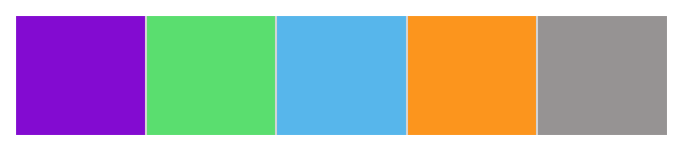

In [113]:
# import dos pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# definição do estilo estético das plotagens
sns.set_style()

# filtragem de warnings
import warnings
warnings.filterwarnings('ignore')   

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#830BD1', '#5ADE6F', '#57B6EB', '#FC951D', '#969393']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))



## Importação do Dataset

In [114]:
df = pd.read_csv('data/acquisition_train.csv')

## Visualização e Entendimento dos Dados

In [115]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [116]:
# Dataframe shape
print('Número de linhas do dataset: ', df.shape[0])
print('Número de colunas do dataset: ', df.shape[1])

Número de linhas do dataset:  45000
Número de colunas do dataset:  43


In [117]:
# Informações sobre o dataset	
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

- Podemos ver que algumas variáveis possuem valores ausentes. Vamos dar uma olhada mais de perto nelas.

In [118]:
# Porcentagem de valores faltantes
print(((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

- Verificar as estatísticas descritivas das variáveis numéricas.

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score_3,44438.0,3.479833e+02,110.429165,0.000000,270.000000,340.000000,420.000000,9.900000e+02
score_4,45000.0,1.000068e+02,3.178080,86.191572,97.867036,100.018900,102.141797,1.139782e+02
score_5,45000.0,5.000371e-01,0.288326,0.000035,0.252150,0.500753,0.748816,9.999734e-01
score_6,45000.0,9.992523e+01,10.016549,60.663039,93.198353,99.974796,106.640275,1.421924e+02
risk_rate,44438.0,2.967172e-01,0.101933,0.000000,0.220000,0.290000,0.360000,9.000000e-01
last_amount_borrowed,15044.0,1.378234e+04,8077.571933,1005.180000,7519.502500,12023.465000,19220.270000,3.505960e+04
last_borrowed_in_months,15044.0,4.176389e+01,10.252705,36.000000,36.000000,36.000000,36.000000,6.000000e+01
credit_limit,31200.0,3.438195e+04,36586.982218,0.000000,10000.000000,25647.000000,47086.750000,4.482690e+05
income,44438.0,7.160739e+04,51858.967748,4821.180000,45010.777500,61266.760000,86019.232500,5.000028e+06
ok_since,18455.0,3.506974e+01,21.663194,0.000000,17.000000,32.000000,50.000000,1.410000e+02


## Relatório Análise Inicial dos Dados

- O dataset possui **43** variáveis e **45.000** registros.
- Dessas **43** variáveis, **8** possuem mais de **10%** de valores missing, **target_fraud** é a variável com a maior porcentagem de valores ausentes **(96.6%)**, em segundo e terceiro lugar temos as variáveis **last_amount_borrowed** e **last_borrowed_in_months** com **(66.5%)** de valores ausentes.
- A variável **target_fraud** mostra se existe ou não fraude de cartão de crédito. Nesse caso essa variável não é importante para o projeto.Portanto, esta coluna será excluída.
- As variáveis **last_amount_borrowed**, **last_borrowed_in_months**, **ok_since** e **external_data_provider_credit_checks_last_2_year** possuem mais de 50% de valores ausentes, substituir esses valores é algo difícil, manter elas pode gerar erros durante a predição. Portanto, estas colunas serão excluídas.
- As variáveis **job_name**, **external_data_provider_first_name**, **profile_phone_number** e **zip** são variáveis insignificantes para o projeto, portanto serão excluídas.
- A variável **external_data_provider_email_seen_before** possui um valor mínimo de -999.000000, certamente foi um erro, nesse caso, vamos alterar para o tipo NaN.
- A variável **reported_income** possui um valor máximo descrito como inf(infinito), nesse caso, vamos alterar para o tipo NaN.
- A variável **credit_limit** possui um valor mínimo de 0.000000, isso não existe em instituições financeiras, é obrigatório liberar um valor X de crédito para o cliente. Portanto, este valor será substituído por NaN.
- As variáveis:
    - **ids**, **score_1**, **score_2**, **reason**, **facebook_profile**, **state**, **zip**, **channel**, **job_name**, **real_state**,
**email**, **external_data_provider_first_name**, **lat_lon**, **marketing_channel**, **external_data_provider_email_seen_before**,
**application_time_in_funnel**, **application_time_applied**, **external_data_provider_fraud_score**, **profile_phone_number**, **shipping_zip_code**, **profile_tags**, **user_agent**, e **target_fraud** são variáveis com valores não significantes para o projeto, portanto serão excluídas.

## Exclusão das Variáveis não significativas

In [120]:
# cópia do dataframe
df2 = df.copy()

In [121]:
exclude_columns = ["ids", "score_1", "score_2", "reason", "facebook_profile", "state", "zip", "channel", "job_name", "real_state",
                    "email", "external_data_provider_first_name", "external_data_provider_email_seen_before","lat_lon", "marketing_channel",
                    "application_time_applied", "profile_phone_number", "application_time_in_funnel","shipping_zip_code", "external_data_provider_fraud_score",
                    "profile_tags", "user_agent", "target_fraud"]

df2.drop(labels = exclude_columns, axis=1, inplace=True)

## Alteração da Variável credit_limit com valor 0

In [122]:
df2['credit_limit'] = df2['credit_limit'].apply(lambda x: np.nan if x == 0 else x)

## Alteração da Variável reported_income com Valor Inf

In [123]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

## Divisão dos dados em treino e teste

- Antes de iniciar as transformações e pré-processamentos dos dados, é necessário dividir o dataset em treino e teste, mas porque?
    - Porque precisamos evitar o "Data Leakage". Data Leakage ocorre quando informações do conjunto de dados de teste ou validação vazam para o conjunto de treinamento durante o pré-processamento ou modelagem, ou quando informaçõpes do target vazam para as features. Nessas situações, o que vai acontecer é que você vai ver um modelo muito bom, mas isso será ilusório, pois o seu modelo "roubou" para ter o resultado bom.

- Referências sobre Data Leakage: 
    - https://www.linkedin.com/company/universidade-dos-dados/posts/?feedView=all
    - https://www.casadocodigo.com.br/products/livro-escd
    - https://estatsite.com.br/2020/12/12/data-leakage-o-erro-que-ate-os-grandes-cometem/


In [124]:
# Dividindo os dados primeiro

X = df2.drop(columns=['target_default'])	
y = df2['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [125]:
train = pd.concat([X_train, y_train], axis=1)
train.reset_index(drop=True, inplace=True)
train.head()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,reported_income,shipping_state,target_default
0,240.0,105.331178,0.893486,94.495216,0.26,NaN,NaN,21968.0,45013.96,NaN,1.0,0.0,11.0,11.0,0.0,2,NaN,92586.0,BR-ES,False
1,270.0,103.211042,0.605574,101.567582,0.33,19237.32,36.0,40972.0,80022.23,NaN,0.0,0.0,12.0,12.0,0.0,3,1.0,95975.0,BR-GO,False
2,260.0,102.557916,0.917576,117.057610,0.28,NaN,NaN,NaN,19225.52,NaN,0.0,0.0,7.0,NaN,NaN,1,NaN,53981.0,BR-PR,False
3,300.0,101.664122,0.627588,89.140113,0.28,NaN,NaN,NaN,60043.78,62.0,NaN,0.0,9.0,NaN,0.0,2,NaN,140976.0,BR-DF,False
4,350.0,109.603725,0.657344,98.574923,0.27,NaN,NaN,156549.0,45032.90,45.0,0.0,0.0,25.0,25.0,NaN,3,NaN,120129.0,BR-SP,False


## Input Missing

In [126]:
train_num_columns = train.select_dtypes(exclude='object').columns
train_cat_columns = train.select_dtypes(include='object').columns

In [127]:
# Input Missing Variáveis Numéricas

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(train.loc[:, train_num_columns])
train.loc[:, train_num_columns] = imputer.transform(train.loc[:, train_num_columns])

# Input Missing Variáveis Categóricas

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(train.loc[:, train_cat_columns])
train.loc[:, train_cat_columns] = imputer.transform(train.loc[:, train_cat_columns])


In [128]:
train.isna().sum()

score_3                                             0
score_4                                             0
score_5                                             0
score_6                                             0
risk_rate                                           0
last_amount_borrowed                                0
last_borrowed_in_months                             0
credit_limit                                        0
income                                              0
ok_since                                            0
n_bankruptcies                                      0
n_defaulted_loans                                   0
n_accounts                                          0
n_issues                                            0
external_data_provider_credit_checks_last_2_year    0
external_data_provider_credit_checks_last_month     0
external_data_provider_credit_checks_last_year      0
reported_income                                     0
shipping_state              

### Exportar Dataset Limpo

In [129]:
train.to_csv('data/train.csv', index=False)

### Separação das Variáveis Numéricas e Categóricas

In [130]:
train_numerical = train.select_dtypes(exclude='object')
train_categorical = train.select_dtypes(include='object')

## Análise Exploratória de Dados

### Análise Univariada

**Score**

O score de crédito é geralmente calculado com base em modelos estatísticos que analisam o histórico financeiro de uma pessoa ou empresa. Esses modelos consideram uma variedade de informações, incluindo:

- Histórico de pagamento: Frequência com que você paga suas contas no prazo.
- Dívidas em aberto: Valor e número de dívidas existentes.
- Uso do crédito: Proporção de crédito usado em relação ao limite disponível (chamado de "taxa de utilização").
- Tempo de crédito: Quantidade de tempo que você possui histórico financeiro.
- Consultas de crédito: Quantas vezes seu relatório de crédito foi consultado recentemente.
- Registros negativos: Presença de atrasos, inadimplências, protestos ou ações judiciais.

O score de crédito é tipicamente representado por um número dentro de um intervalo, como:
- 300 a 850 (nos EUA, em modelos como FICO ou VantageScore)
- 0 a 1.000 (no Brasil, por birôs como Serasa, Boa Vista ou SPC)

O score brasileiro é geralmente dividido em faixas:

- Baixo (0-300): Alto risco de inadimplência.
- Médio (301-700): Risco moderado.
- Alto (701-1000): Baixo risco de inadimplência.

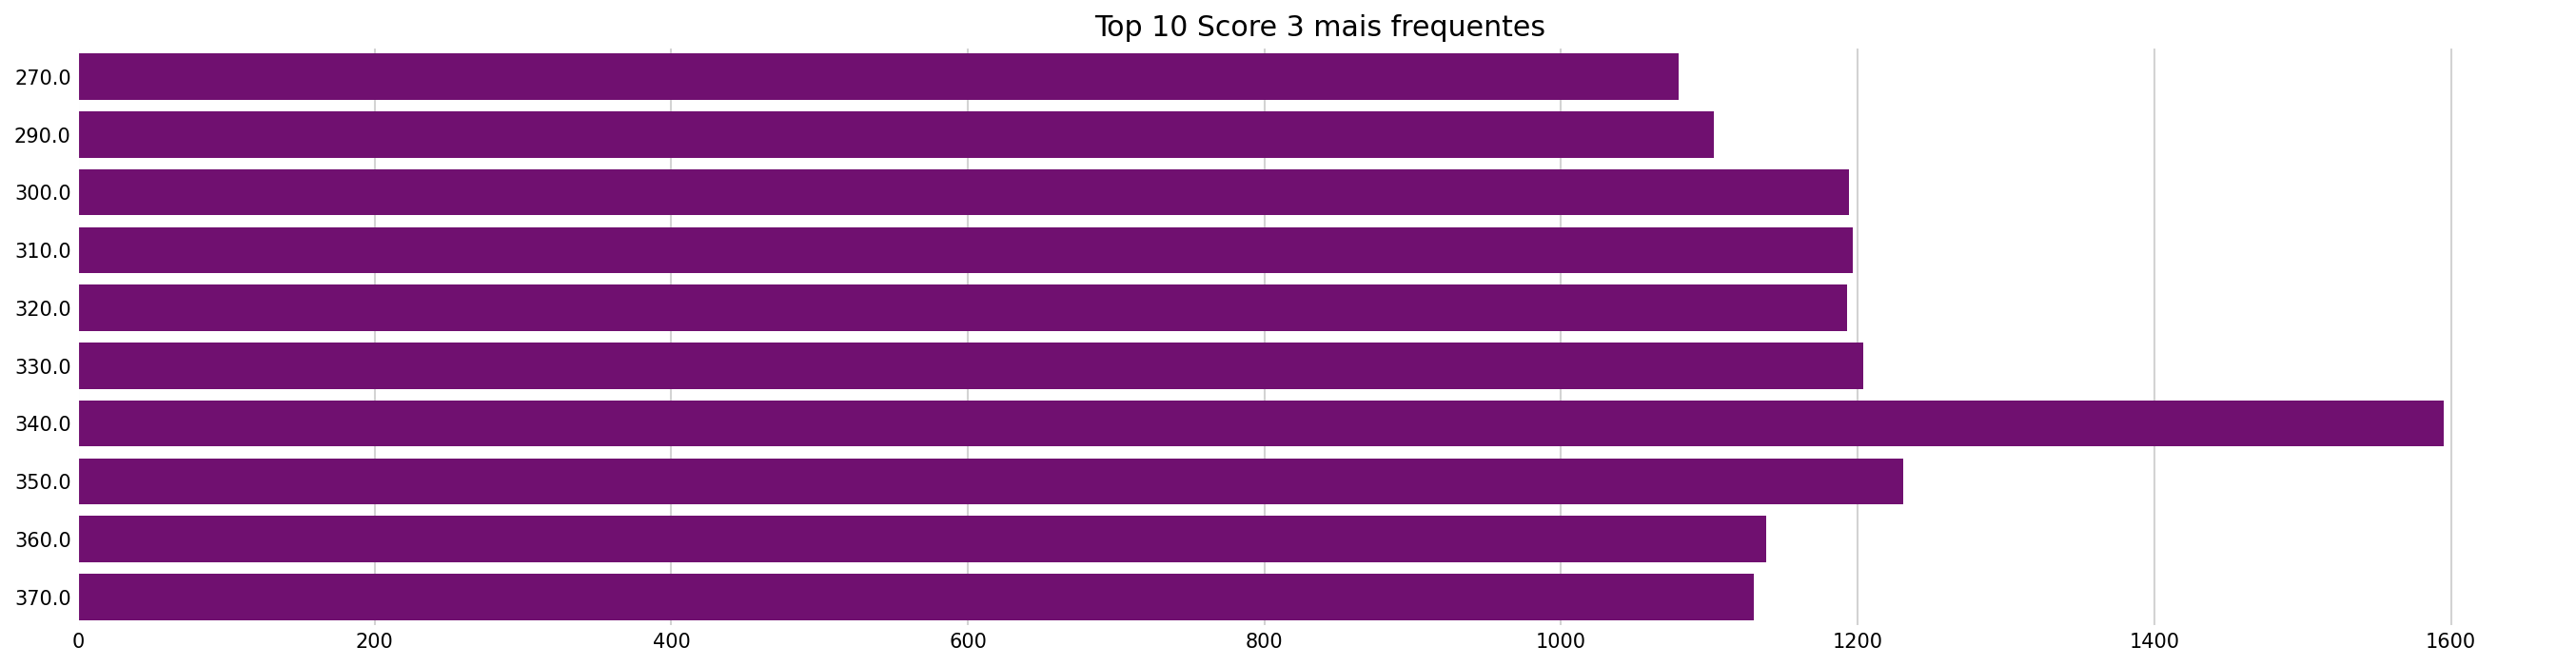

In [131]:
# TOP 10 SCORE 3 MAIS FREQUENTES
top10 = train.score_3.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Score 3 mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

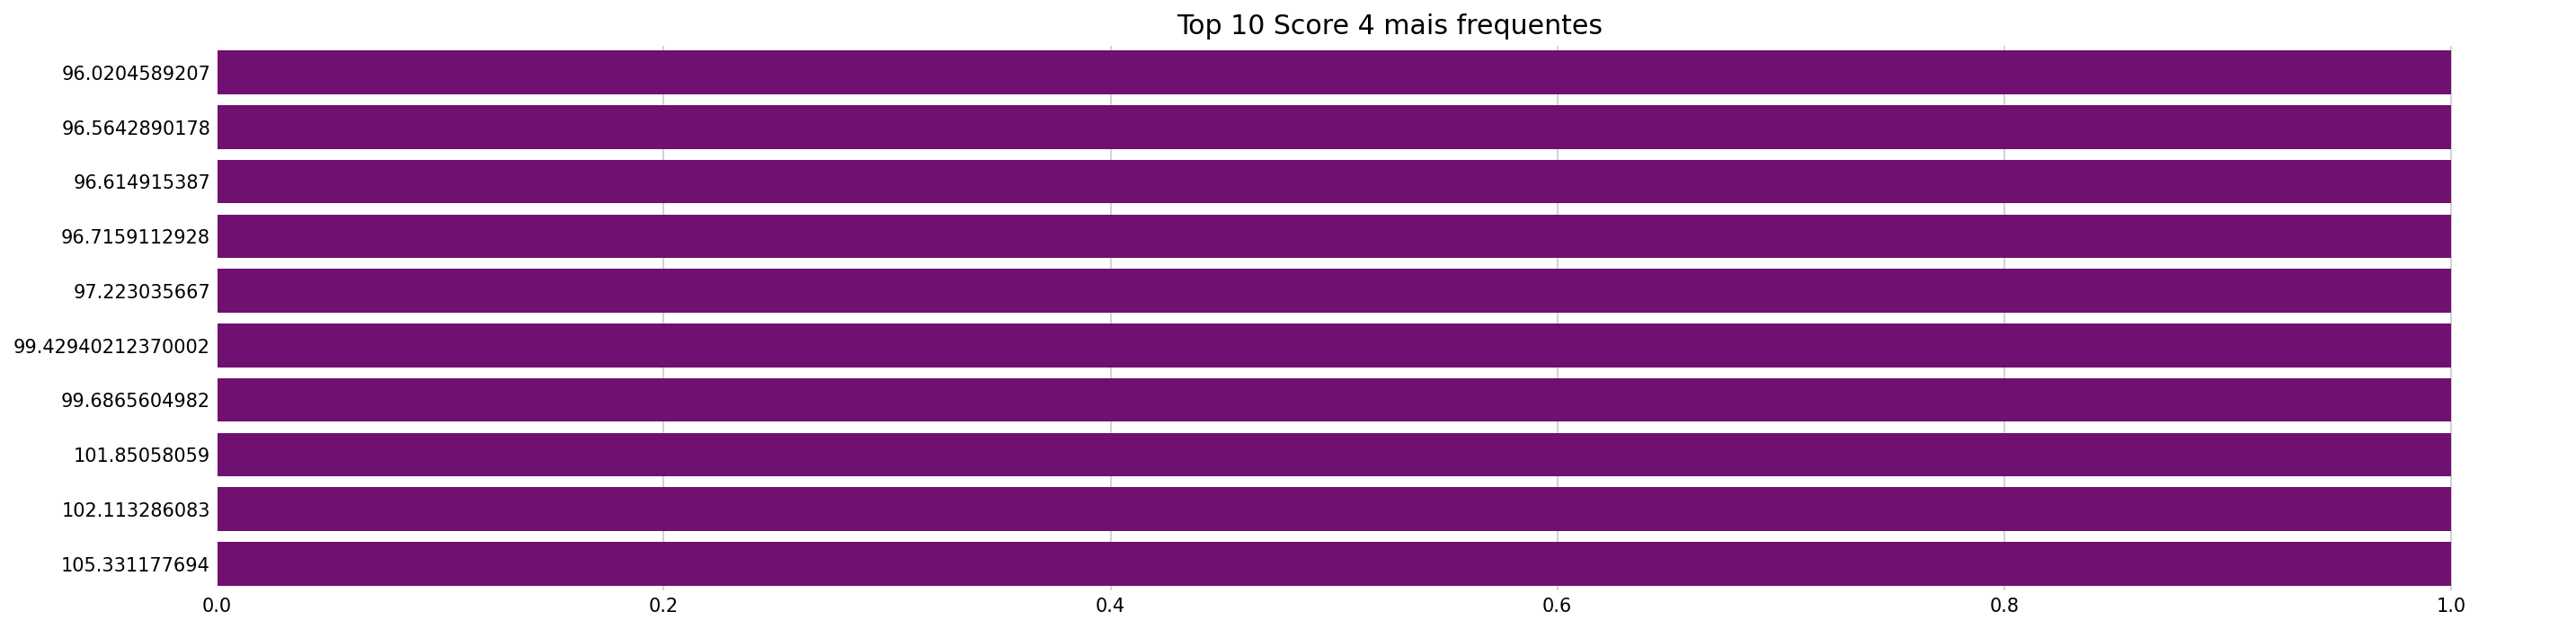

In [132]:
# TOP 10 SCORE 4 MAIS FREQUENTES
top10 = train.score_4.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Score 4 mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

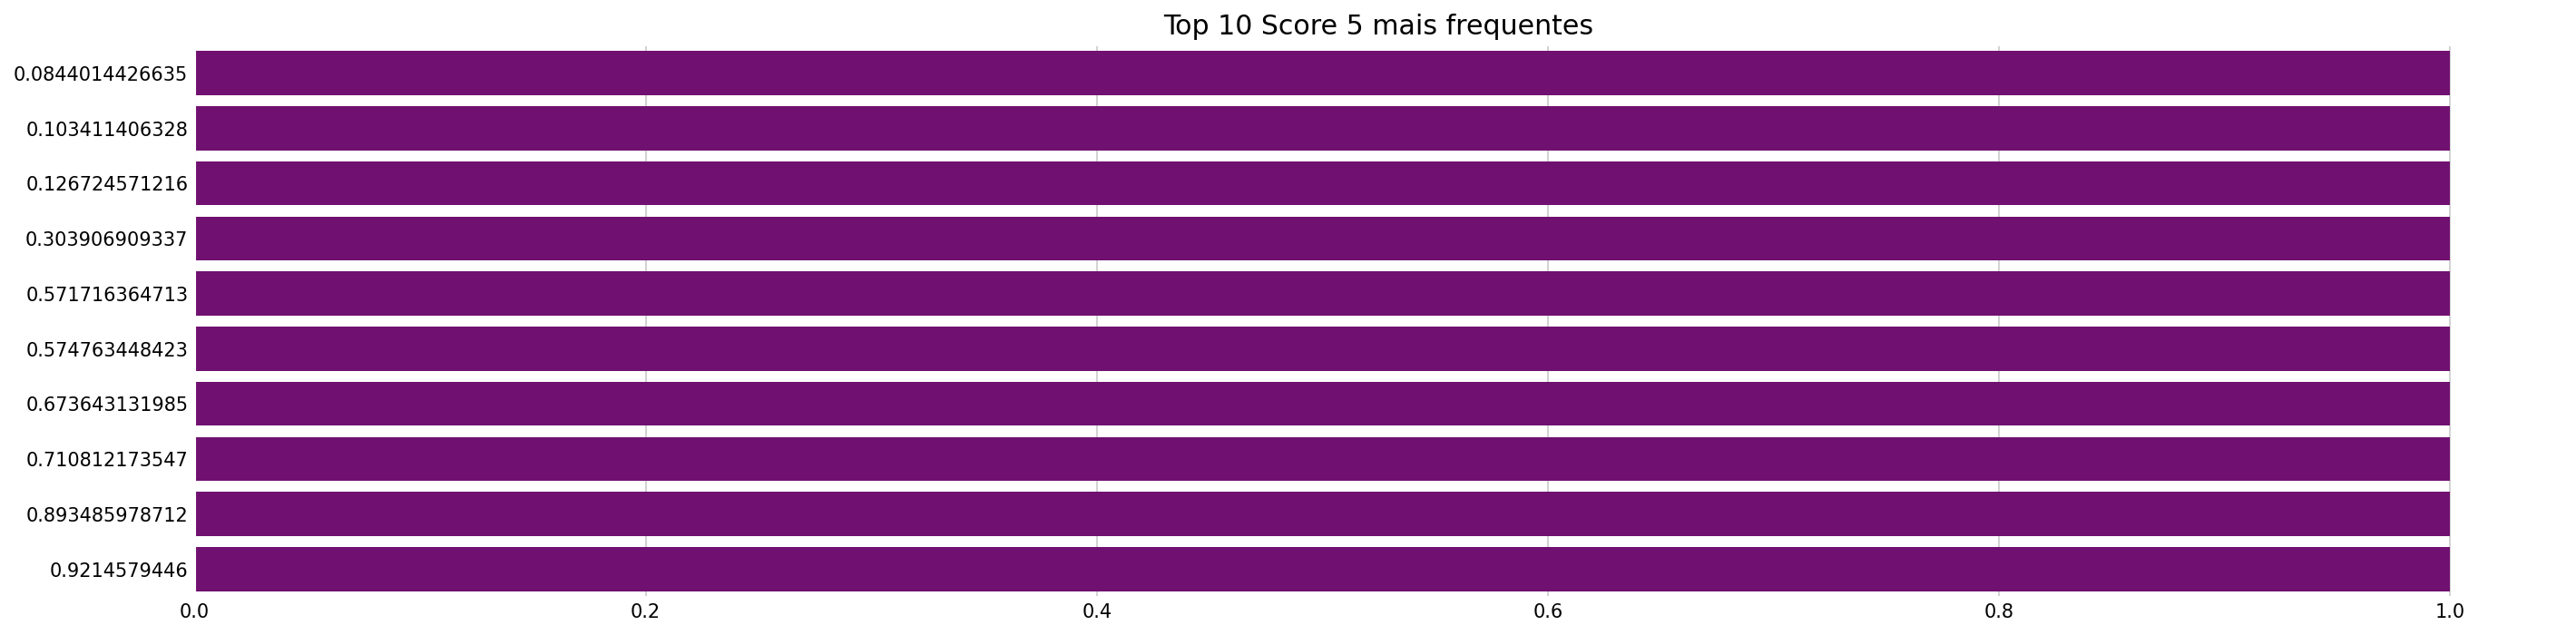

In [133]:
# TOP 10 SCORE 5 MAIS FREQUENTES
top10 = train.score_5.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Score 5 mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

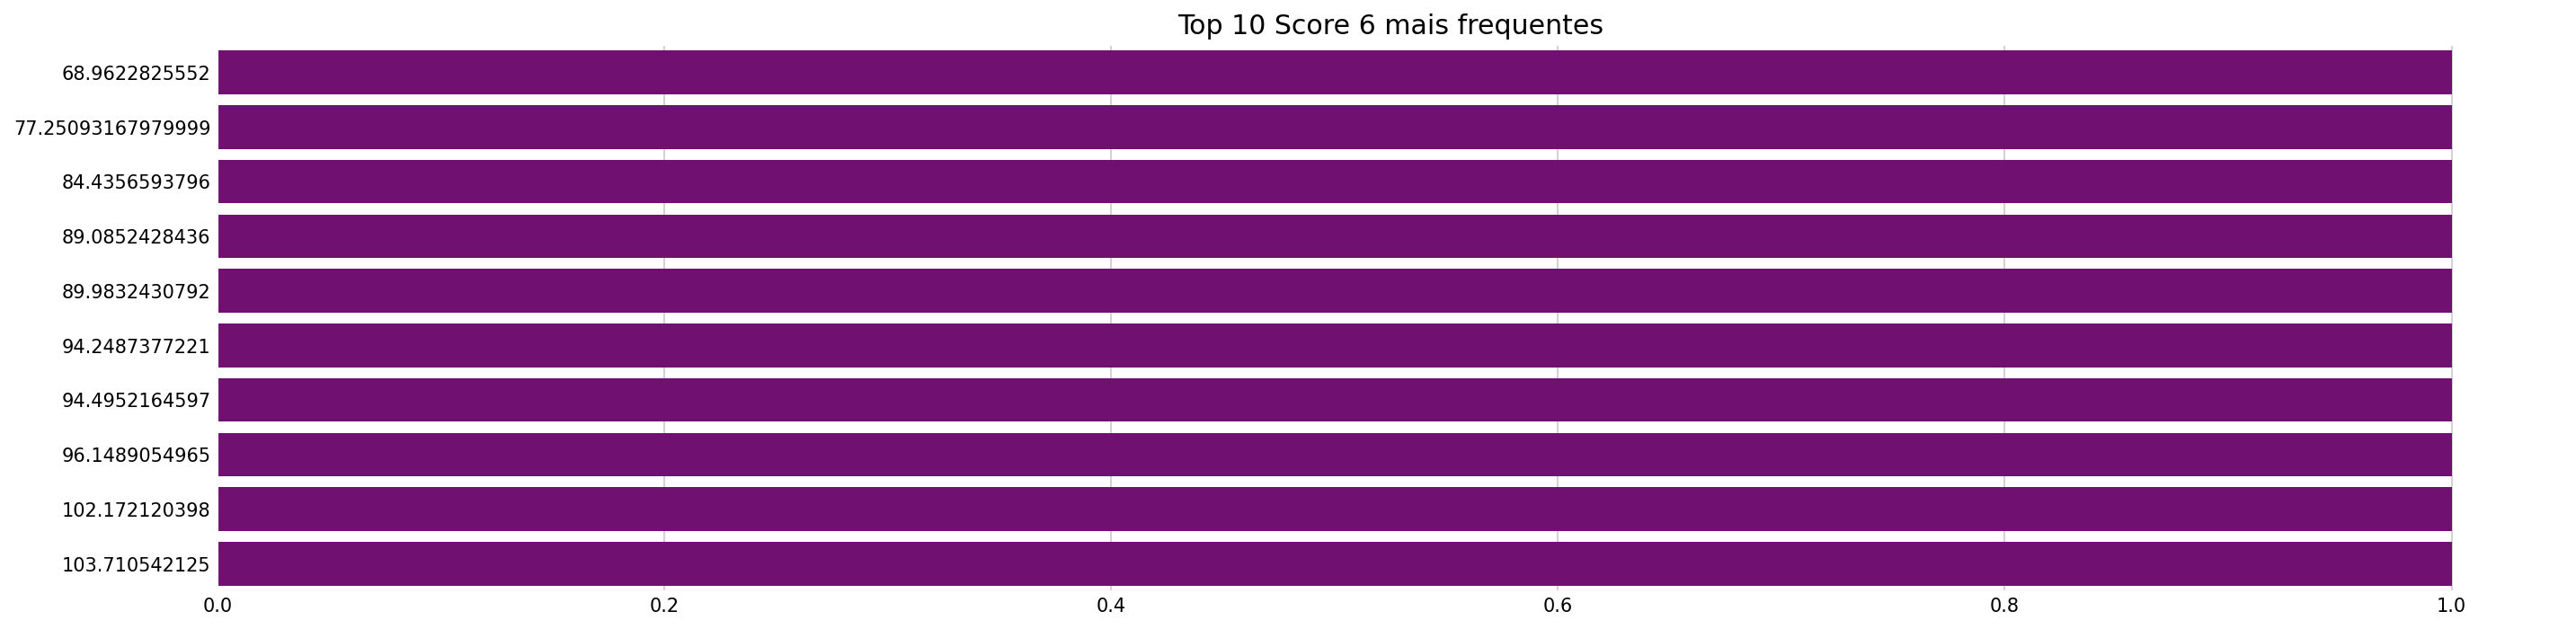

In [134]:
# TOP 10 SCORE 6 MAIS FREQUENTES
top10 = train.score_6.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Score 6 mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

- Entre os Scores vou utilizar o score_3 por ser mais robusto para comparação com outras variáveis, possui uma distribuição de frequência melhor. 

**Risk Rate**

O termo "risk rate" (taxa de risco) se refere à probabilidade ou ao nível de risco associado a uma determinada situação, investimento, crédito ou evento. Dependendo do contexto, pode ser calculado de diferentes maneiras, mas, em geral, o "risk rate" indica o grau de risco envolvido e pode influenciar decisões financeiras, políticas ou operacionais.

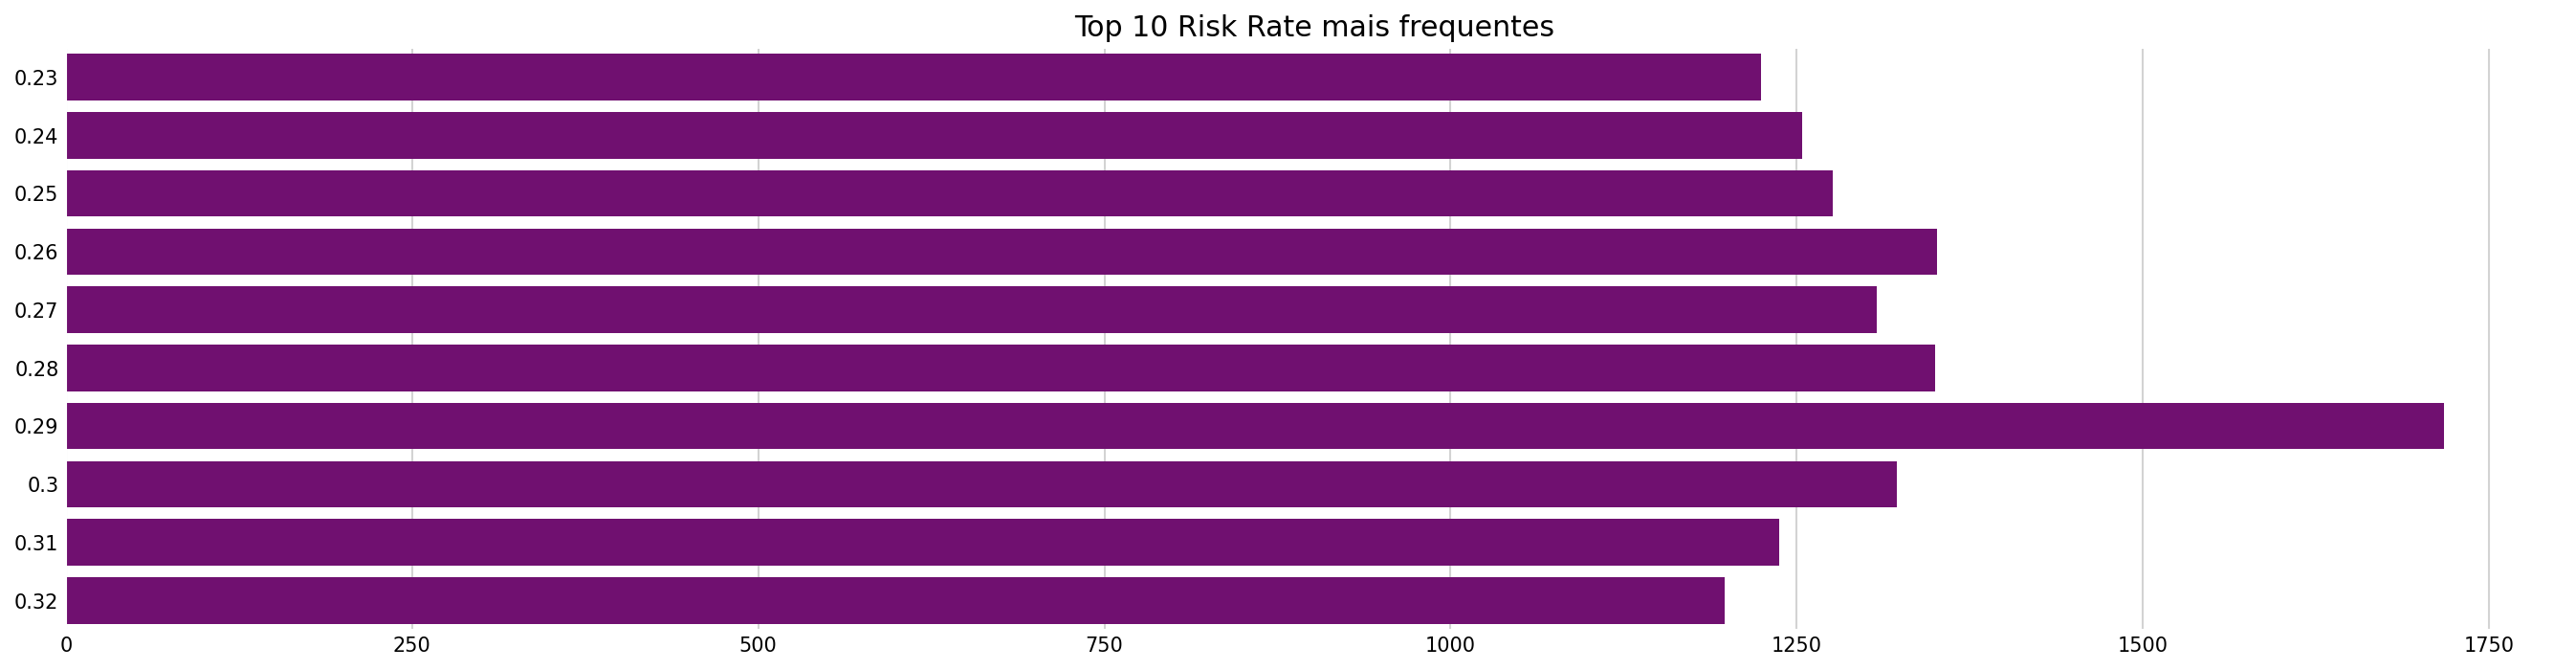

In [135]:
# TOP 10 RISK RATE MAIS FREQUENTES
top10 = train.risk_rate.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Risk Rate mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

Risk Rate máximo para comparação.

In [136]:
train.risk_rate.max()

0.9

- 0.29 é taxa de risk rate mais frequente, seguida de 0.28 e 0.26, onde o valor máximo de risk rate é 0.9.

**Last Amount Borrowed**

"Last Amount Borrowed" (em português, "Último Valor Emprestado") refere-se ao valor mais recente que você tomou emprestado em uma transação financeira, como um empréstimo bancário, um crédito rotativo ou qualquer outro tipo de operação de crédito. Esse termo geralmente é usado em relatórios financeiros, aplicativos de empréstimos ou plataformas de gestão financeira para indicar o valor do empréstimo mais recente.

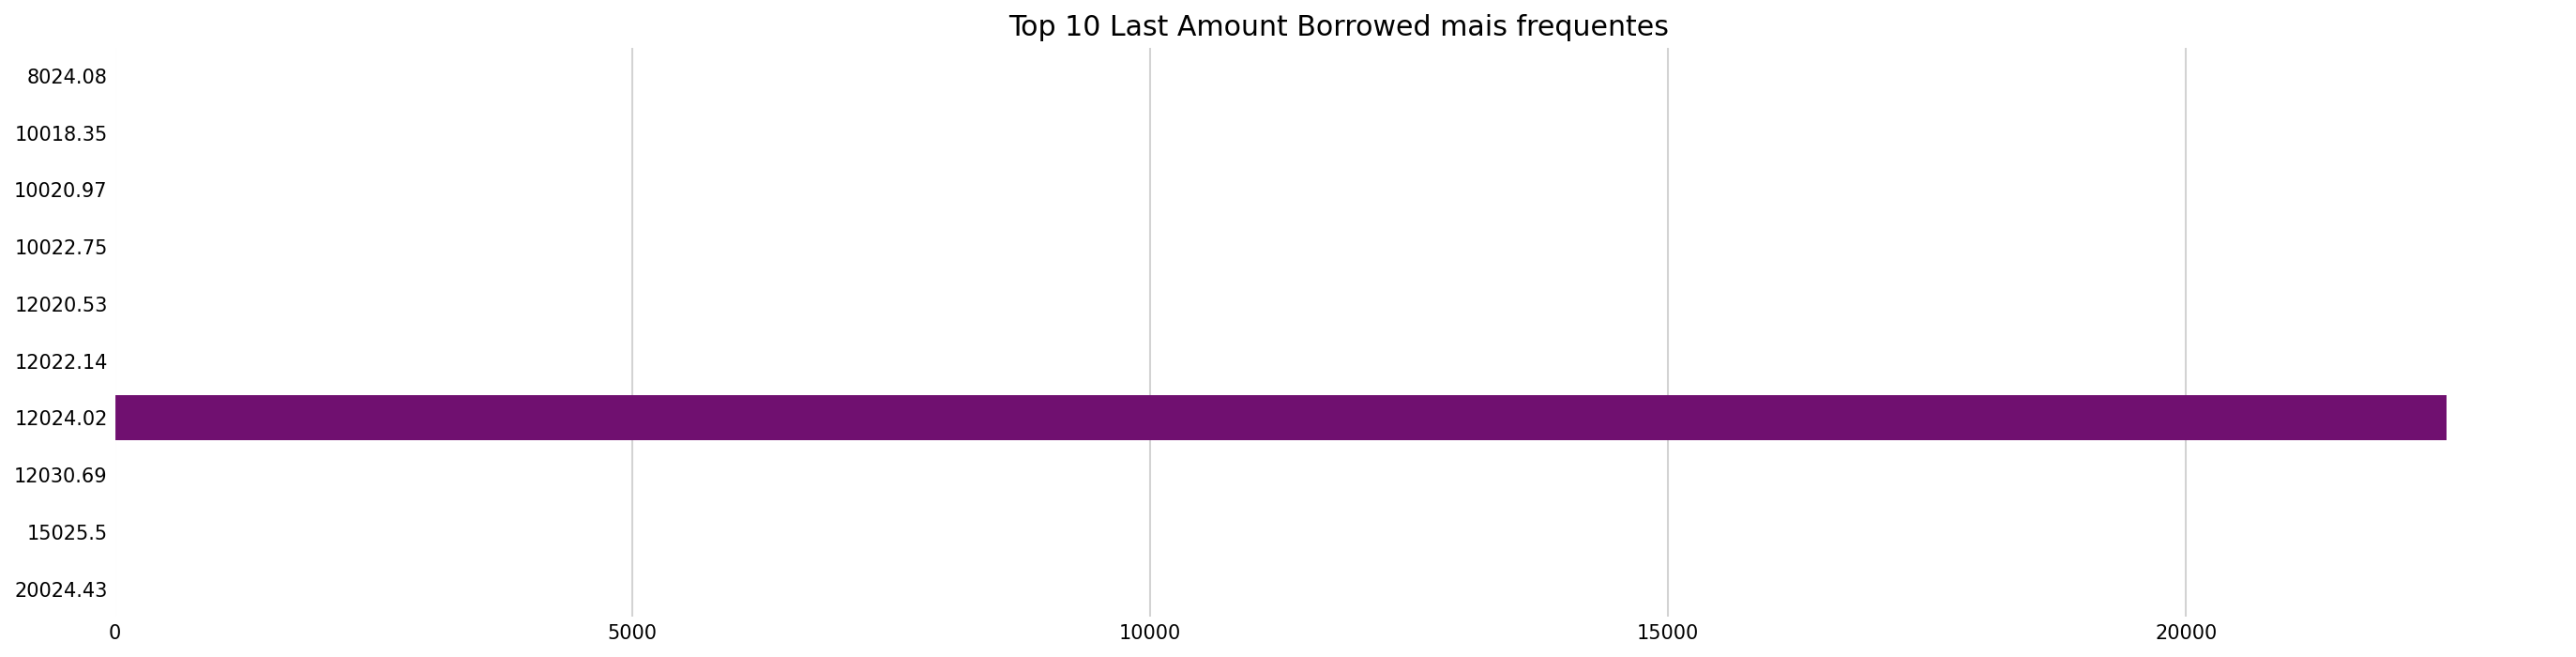

In [137]:
# TOP 10 LAST AMOUNT BORROWED MAIS FREQUENTES
top10 = train.last_amount_borrowed.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Last Amount Borrowed mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [138]:
train.last_amount_borrowed.value_counts().head(10)

last_amount_borrowed
12024.02    22512
10022.75        3
8024.08         3
10020.97        3
20024.43        3
12022.14        3
15025.50        3
12020.53        3
10018.35        3
12030.69        3
Name: count, dtype: int64

- Temos algo interessante, o valor de 12024.02 é praticamente o valor mais frequente de todos. 

**Last Borrowed in Months**

"Last Borrowed in Months" (em português, "Último Empréstimo em Meses") refere-se ao número de meses que se passaram desde a última vez que você tomou um empréstimo ou utilizou crédito.

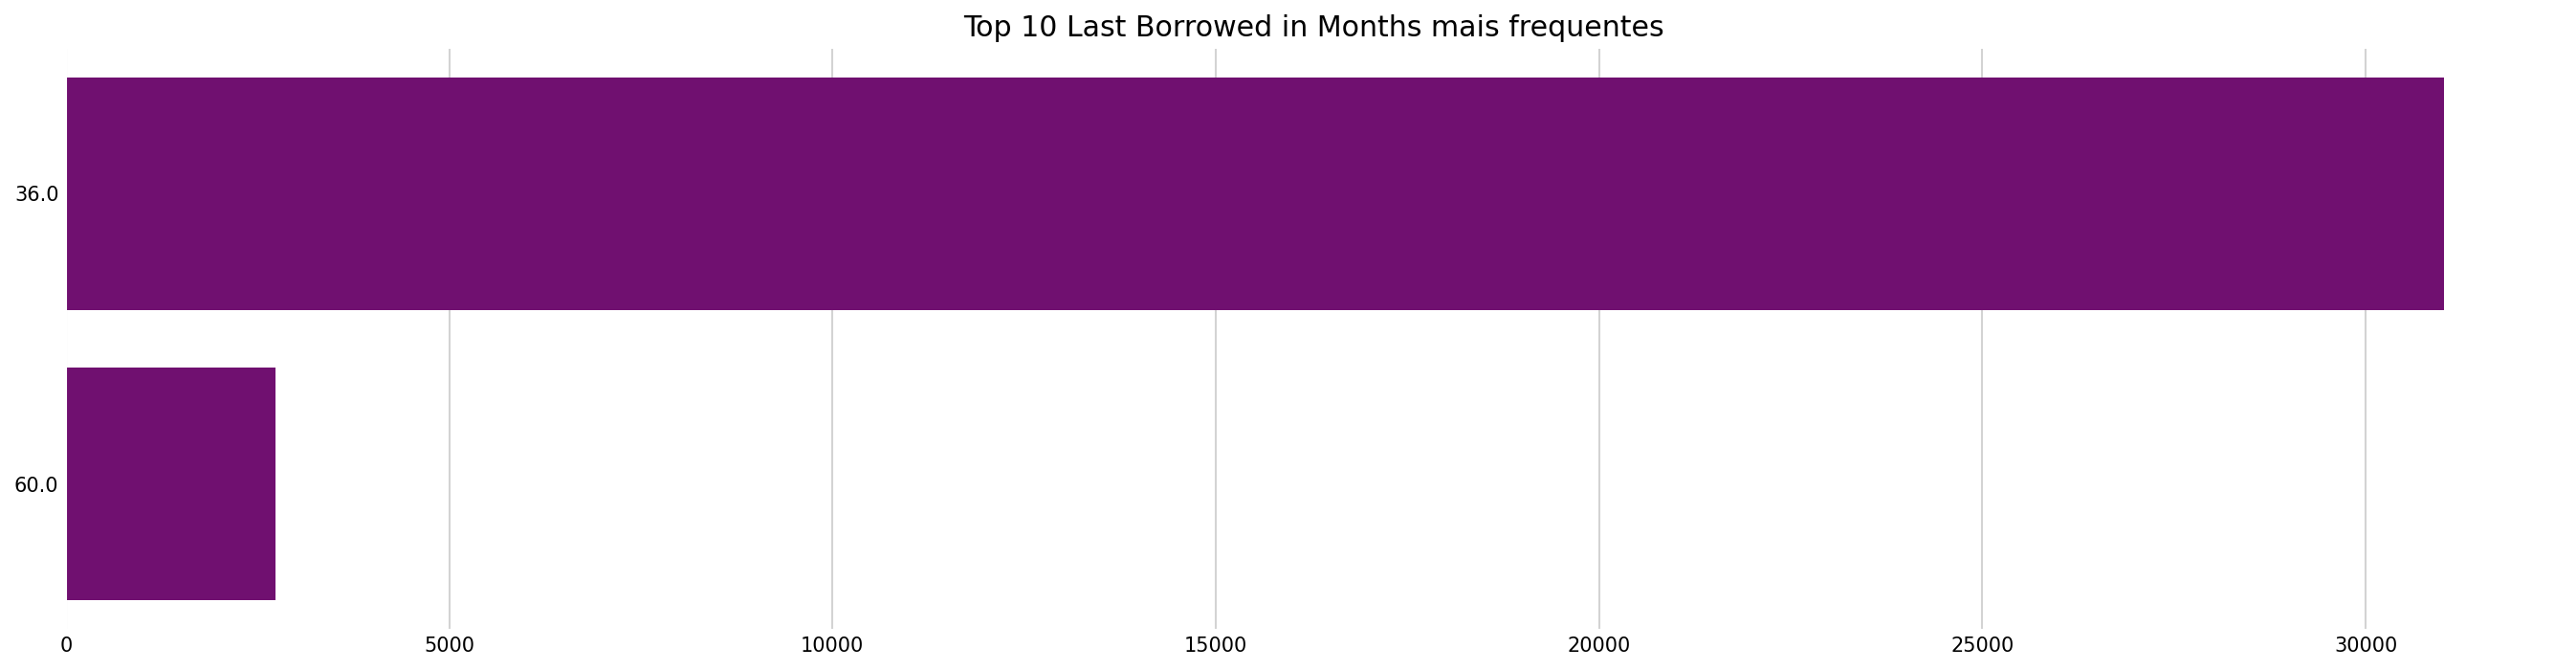

In [139]:
# LAST BORROWED IN MONTHS MAIS FREQUENTES
last_borrowed_freq = train.last_borrowed_in_months.value_counts()

plt.figure(figsize=(20,5))
plt.title('Top 10 Last Borrowed in Months mais frequentes')
ax = sns.barplot(y=last_borrowed_freq.index, x=last_borrowed_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

- 36 meses é o intervalo com mais frequência.

**Credit Limit**

Credit Limit (em português, "Limite de Crédito") é o valor máximo de crédito que uma instituição financeira, como um banco ou operadora de cartão de crédito, permite que você utilize. É o teto definido para gastos em um cartão de crédito, cheque especial ou linha de crédito.

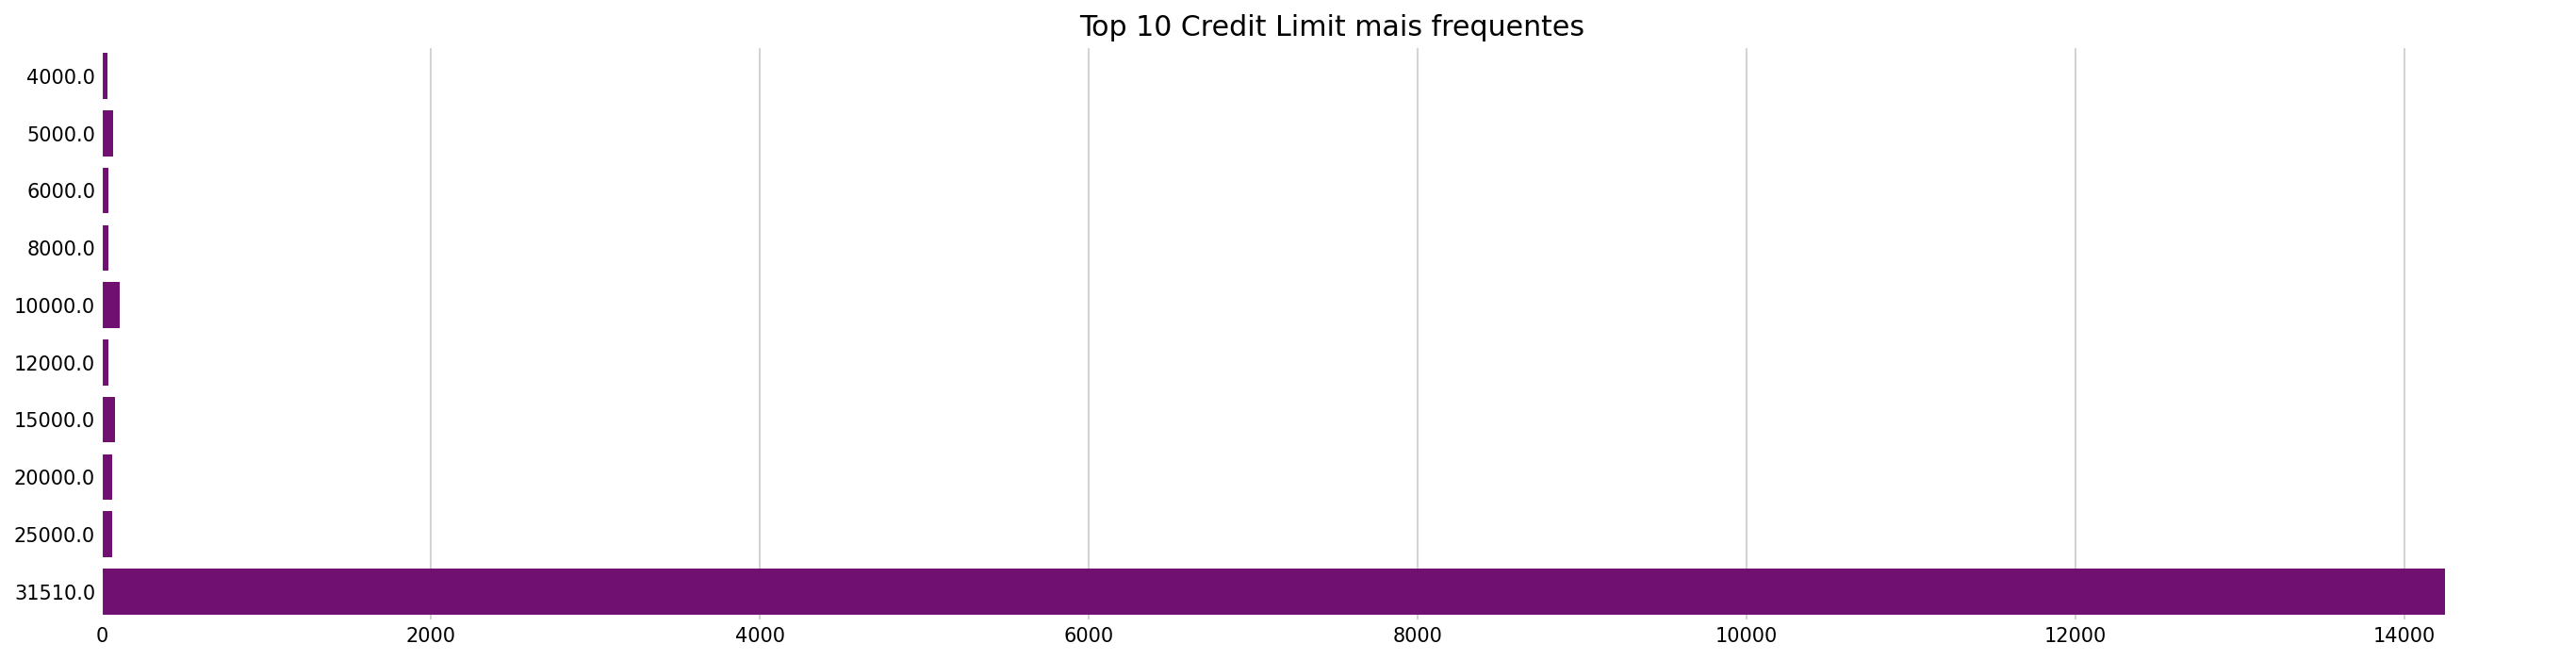

In [140]:
# TOP 10 CREDIT LIMIT MAIS FREQUENTES
top10 = train.credit_limit.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Credit Limit mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [141]:
train.credit_limit.value_counts().head(10)

credit_limit
31510.0    14246
10000.0      107
15000.0       78
5000.0        66
25000.0       62
20000.0       62
12000.0       40
8000.0        39
6000.0        38
4000.0        30
Name: count, dtype: int64

- Novamente temos algo interessante, em credit limit o valor de 31510.0 é o valor de limite de crédito mais frequente e disparado com mais de 14.000 registros, em segundo lugar vem o valor de 10000.0 com 107 registros.

**Income**

Income (em português, "Renda" ou "Receita") refere-se ao dinheiro que uma pessoa, empresa ou entidade ganha, geralmente como resultado de trabalho, investimentos, negócios ou outros meios. É uma medida fundamental da capacidade financeira de alguém ou de uma organização.

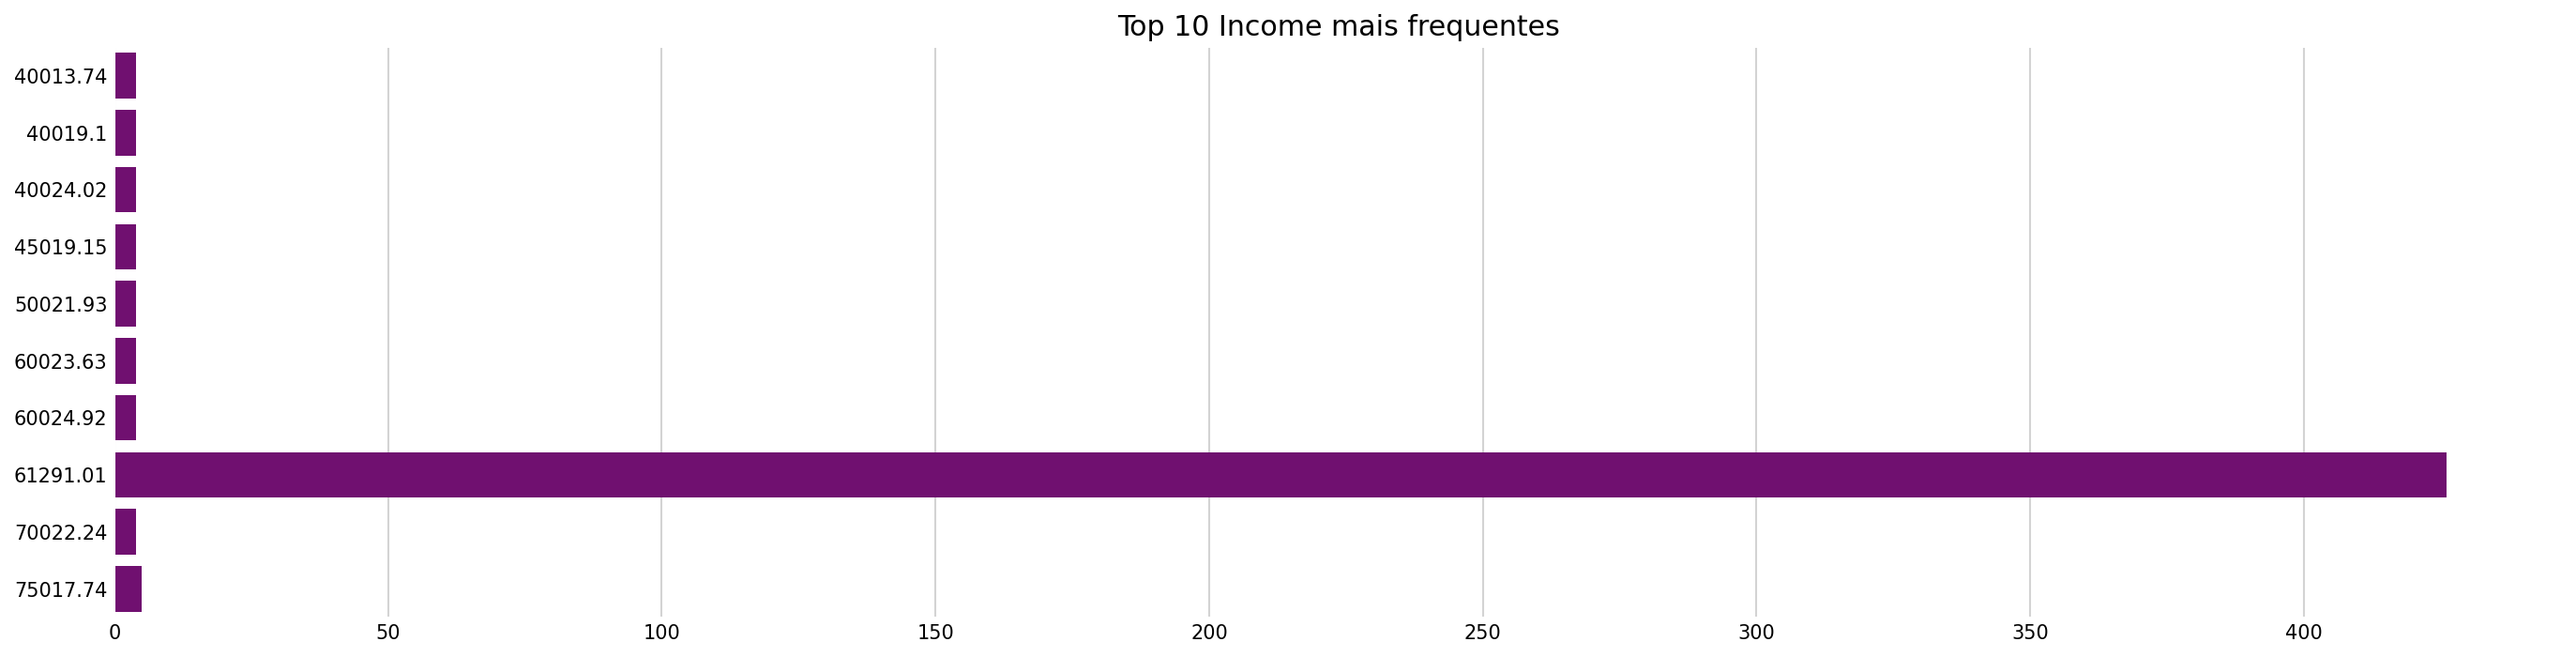

In [142]:
# TOP 10 INCOME MAIS FREQUENTES
top10 = train.income.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Income mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [143]:
train.income.value_counts().head(10)

income
61291.01    426
75017.74      5
60023.63      4
70022.24      4
60024.92      4
40024.02      4
40013.74      4
40019.10      4
45019.15      4
50021.93      4
Name: count, dtype: int64

- E outra vez temos algo interessante, disparado com maior frequência temos o valor de 61291.01 com o valor de renda.

**Ok since**

"Ok Since" (em português, algo como "Está Ok Desde") é um termo geralmente usado em relatórios financeiros, de crédito ou em sistemas de análise de dados para indicar a data ou o período em que um registro ou situação começou a ser considerado positivo, estável ou em conformidade.

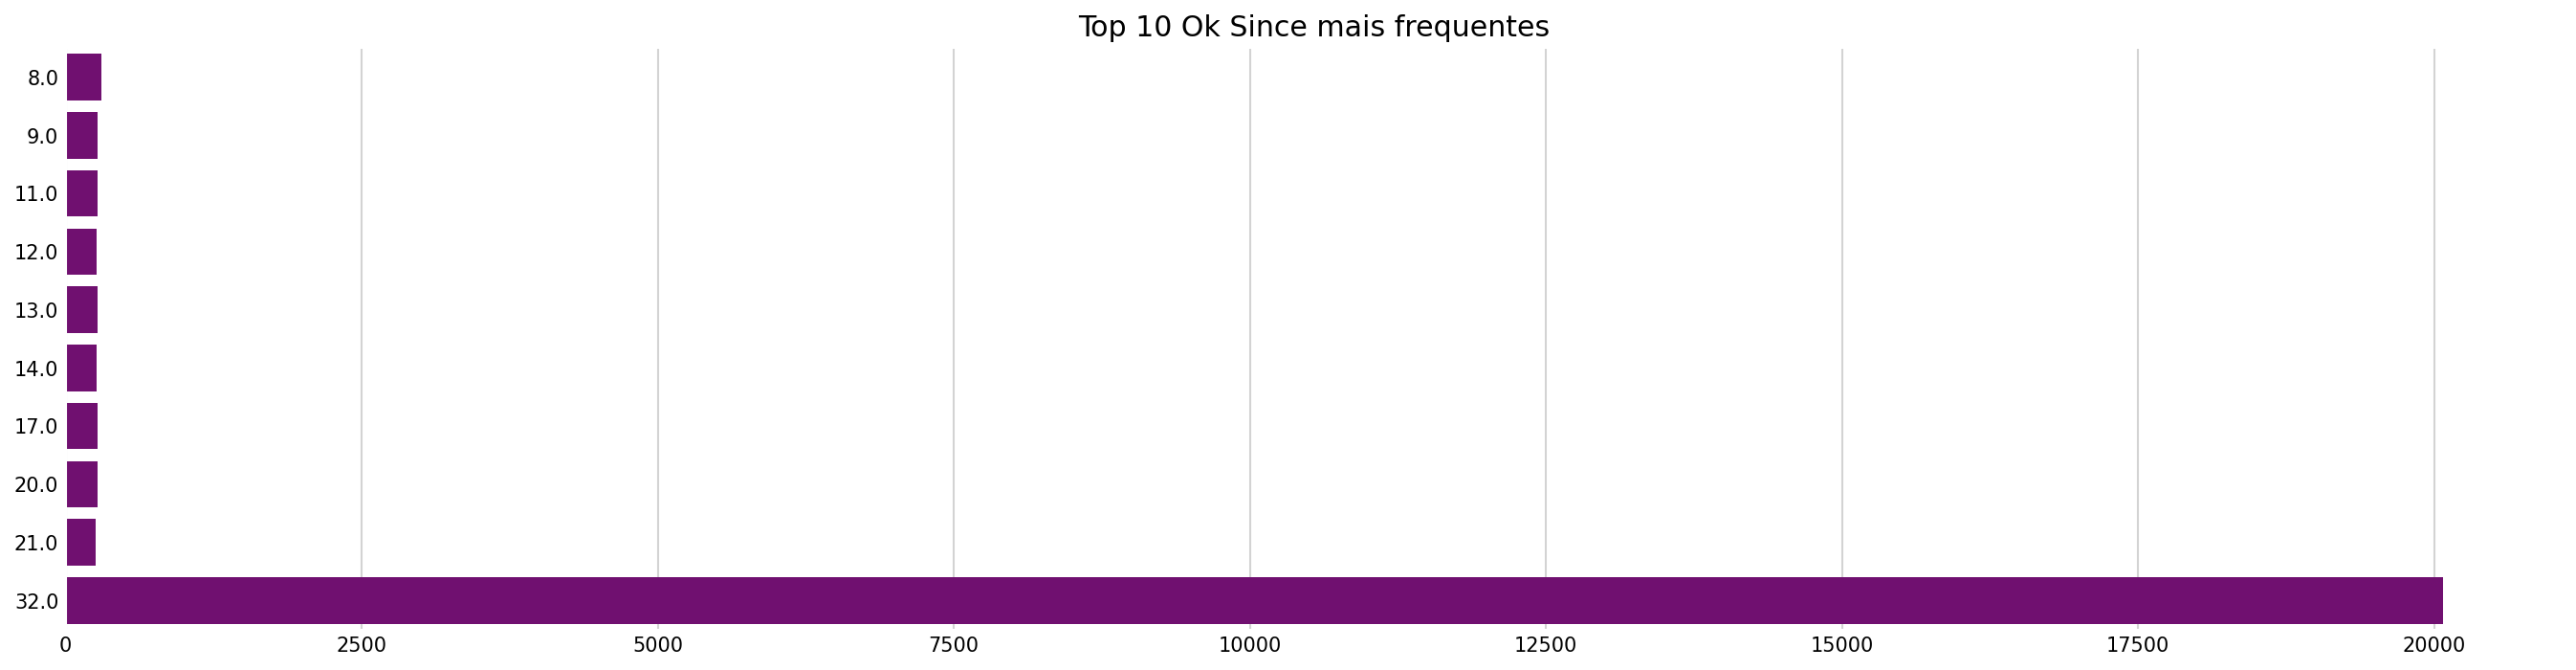

In [144]:
# TOP 10 OK SINCE MAIS FREQUENTES
top10 = train.ok_since.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Top 10 Ok Since mais frequentes')
ax = sns.barplot(y=top10.index, x=top10, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [145]:
train.ok_since.value_counts().head(10)

ok_since
32.0    20079
8.0       298
9.0       272
11.0      271
13.0      270
20.0      269
17.0      267
14.0      260
12.0      259
21.0      255
Name: count, dtype: int64

- Aqui mais outro valor interessante, o valor mais frequente é o valor com 32.0, provavelmente esses valores significam 32 semanas, ou 32 meses, ou 32 dias pra indicar que um empréstimo está em bom estado, sem atrasos ou problemas.

**N Bankruptcies**

"N Bankruptcies" (em português, "Número de Falências" ou "Número de Insolvências") refere-se à quantidade de vezes que uma pessoa ou empresa declarou falência ou insolvência oficialmente. É uma métrica usada, principalmente, em relatórios de crédito e análise financeira, para avaliar o histórico financeiro de um indivíduo ou organização.

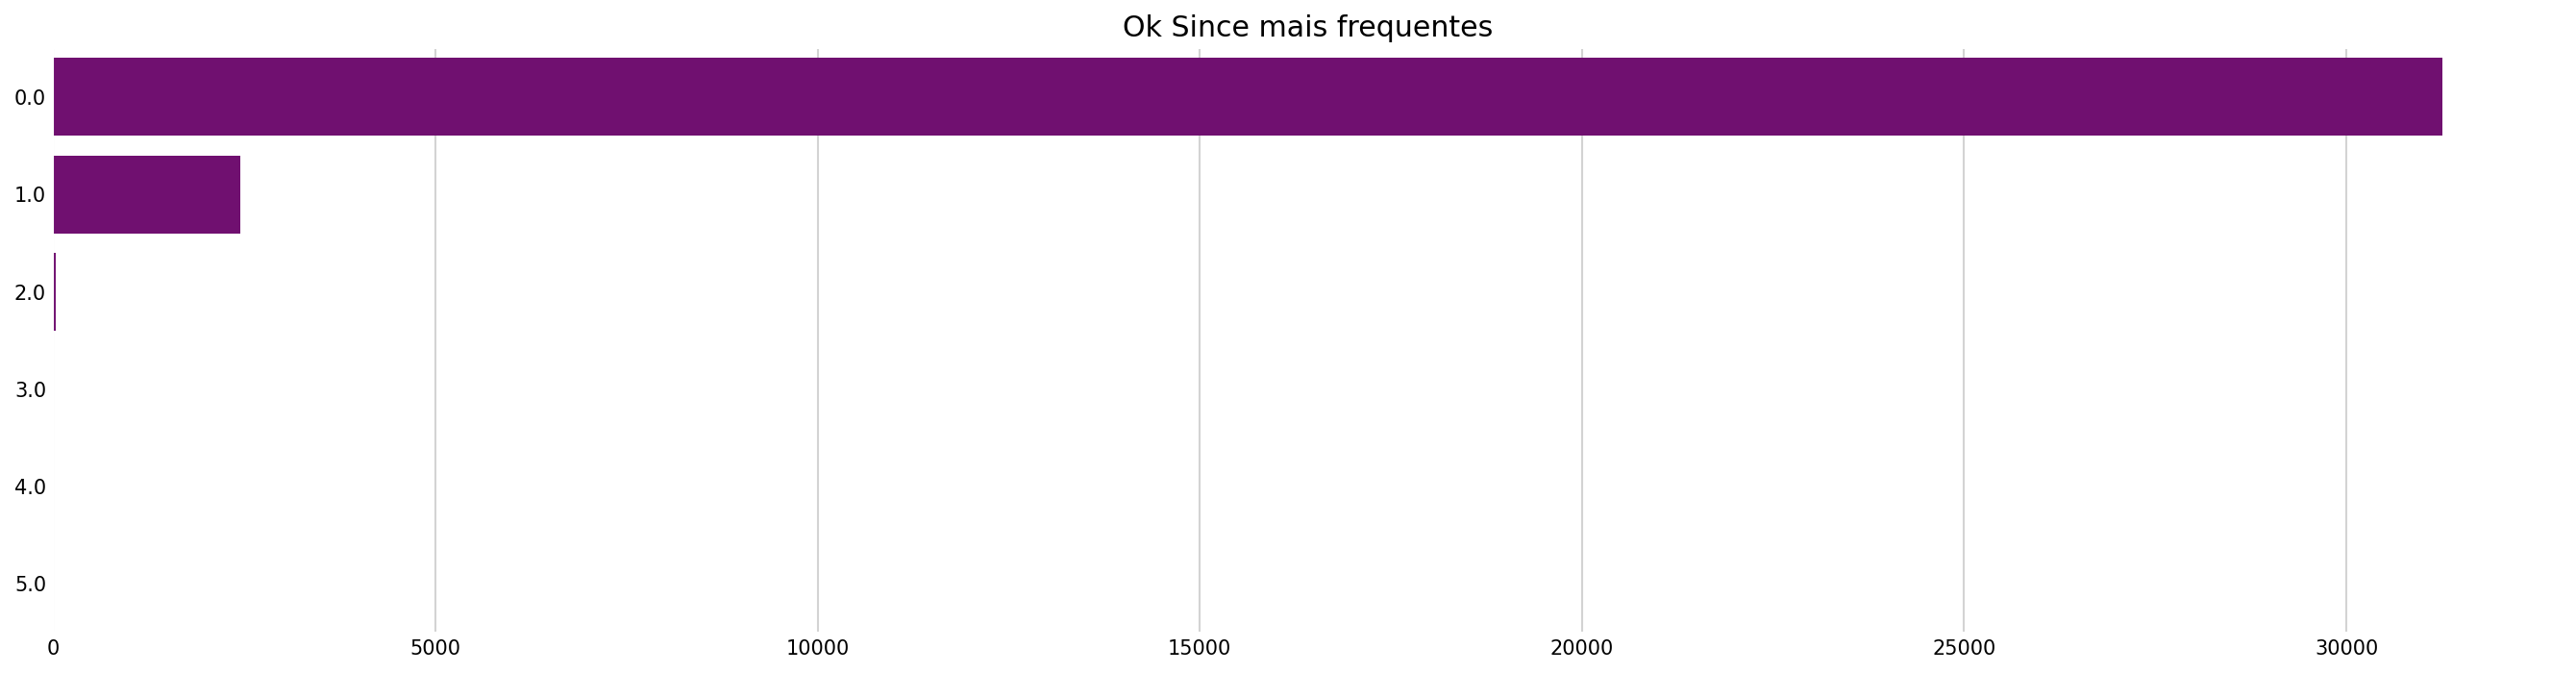

In [146]:
# OK SINCE MAIS FREQUENTES
nbankruptcies_freq = train.n_bankruptcies.value_counts()

plt.figure(figsize=(20,5))
plt.title('Ok Since mais frequentes')
ax = sns.barplot(y=nbankruptcies_freq.index, x=nbankruptcies_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [147]:
train.n_bankruptcies.value_counts()

n_bankruptcies
0.0    31259
1.0     2448
2.0       36
3.0        4
4.0        2
5.0        1
Name: count, dtype: int64

- Podemos ver que grande parte dos clientes não tiveram declaração de falência, apenas em 1 declaração de falência há mais registros, 2, 3, 4 e 5 seguem com pouquíssimos registros.

**N Defaulted Loans**

"N Defaulted Loans" (em português, "Número de Empréstimos em Inadimplência") refere-se à quantidade de empréstimos que uma pessoa ou empresa deixou de pagar de acordo com os termos estabelecidos no contrato, resultando em inadimplência. Essa métrica é usada principalmente em relatórios de crédito e análises financeiras para avaliar o histórico de pagamentos e a confiabilidade de um tomador de crédito.

Exemplo de **N Defaulted Loans**:

N = 0: Nunca teve um empréstimo em inadimplência.

N = 3: Teve três empréstimos em inadimplência.

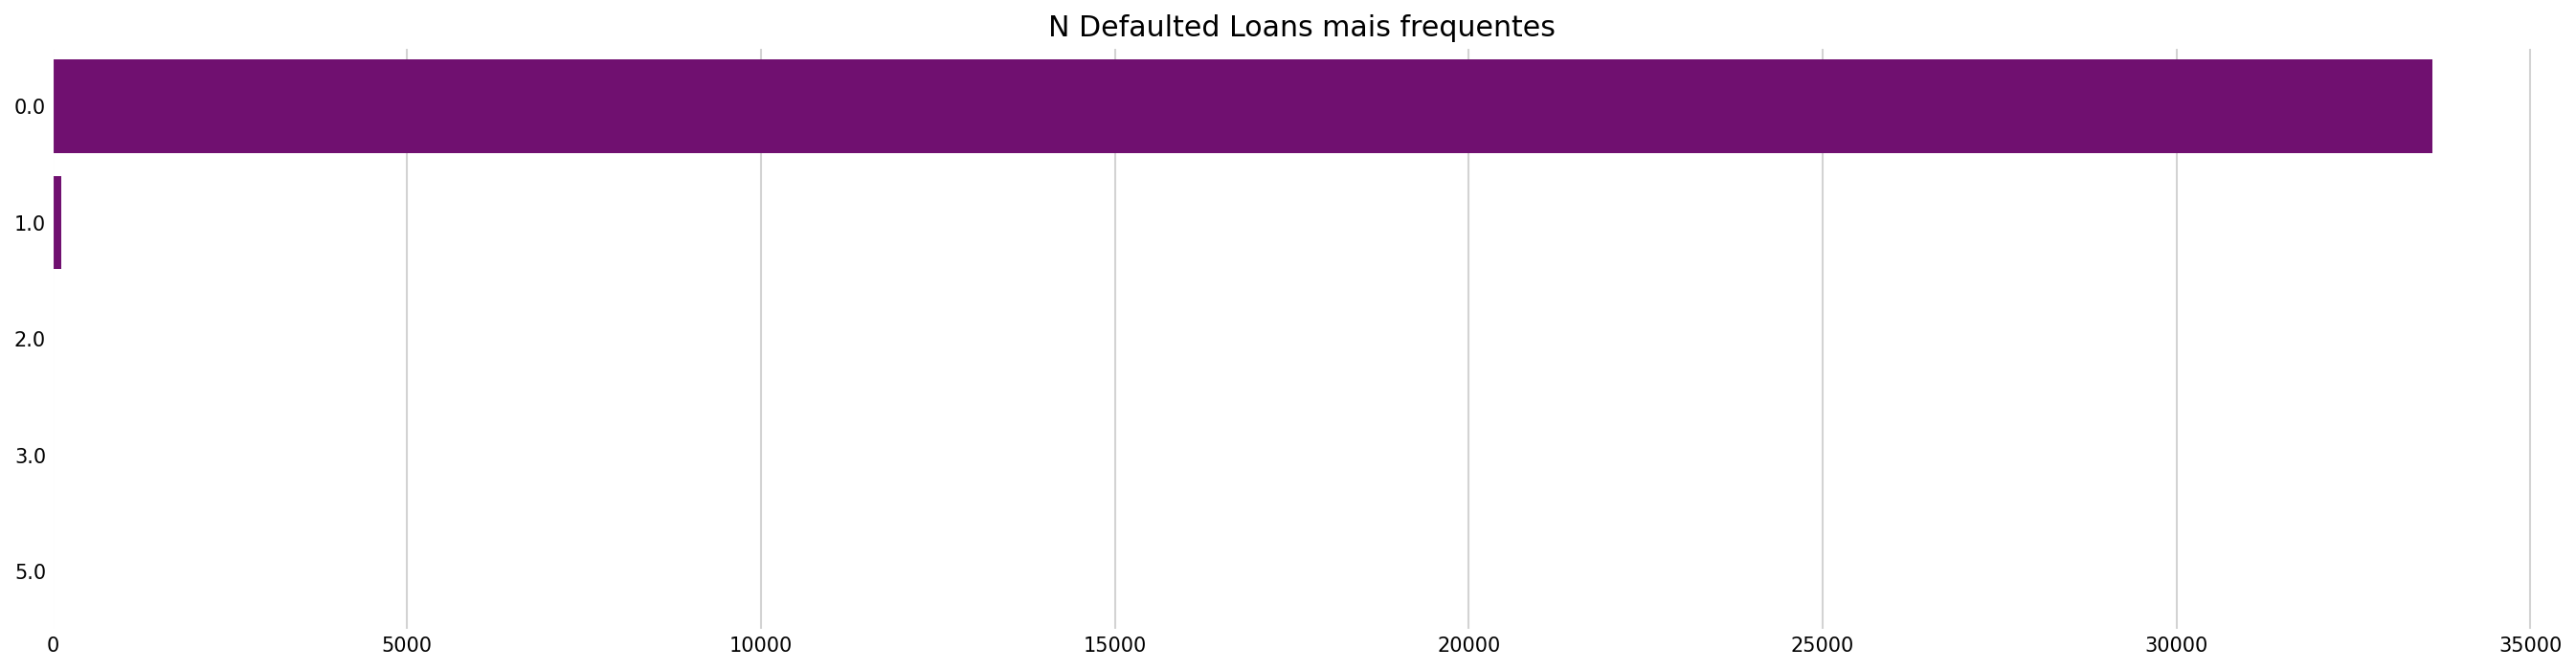

In [148]:
# N DEFAULTED LOANS MAIS FREQUENTES
ndefaultedloans_freq = train.n_defaulted_loans.value_counts()

plt.figure(figsize=(20,5))
plt.title('N Defaulted Loans mais frequentes')
ax = sns.barplot(y=ndefaultedloans_freq.index, x=ndefaultedloans_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [149]:
train.n_defaulted_loans.value_counts()

n_defaulted_loans
0.0    33616
1.0      117
2.0       13
3.0        3
5.0        1
Name: count, dtype: int64

- Podemos ver que grande parte dos empréstimos não estão em inadimplência, apenas 117 clientes com 1 empréstimo em inadimplência, 13 clientes com 2 empréstimos em inadimplência, 3 clientes com 3 empréstimos em inadimplência, e 1 cliente com 5 empréstimos em inadimplência.

**N Accounts**

"N Accounts" (em português, "Número de Contas") refere-se à quantidade total de contas financeiras ou de crédito que uma pessoa ou empresa possui em seu nome. Esse termo geralmente aparece em relatórios de crédito, avaliações financeiras ou sistemas de gerenciamento financeiro.

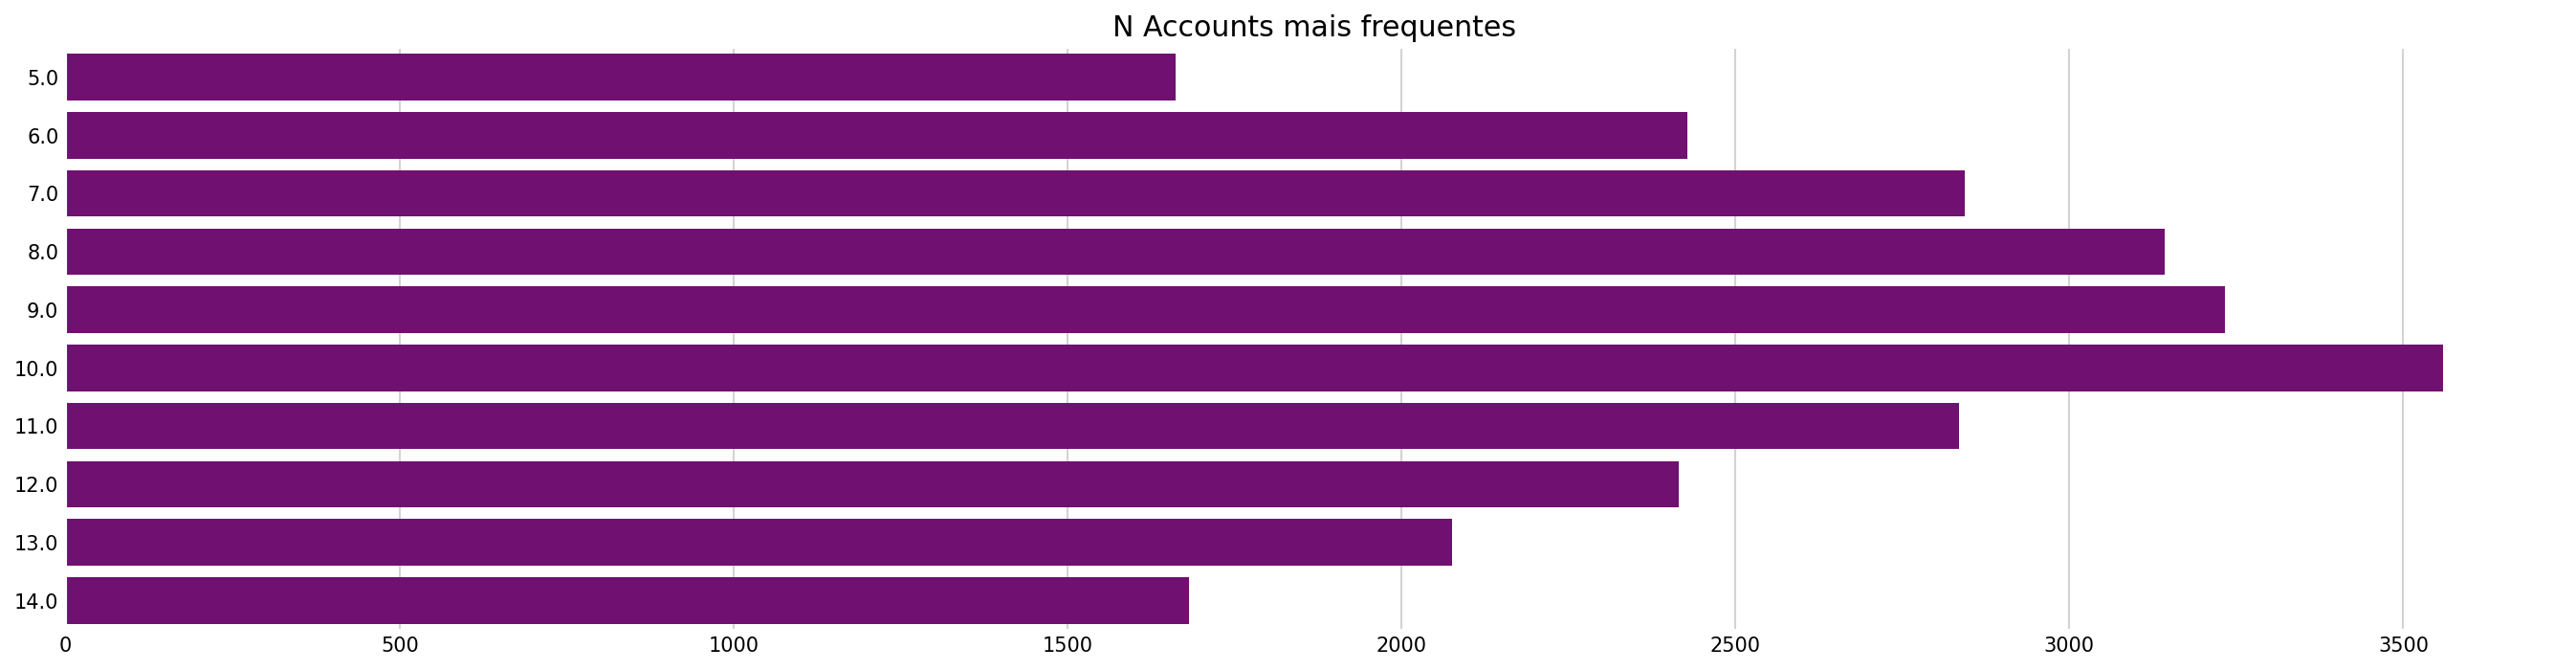

In [150]:
# TOP 10 N ACCOUNTS MAIS FREQUENTES
n_accounts_freq = train.n_accounts.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('N Accounts mais frequentes')
ax = sns.barplot(y=n_accounts_freq.index, x=n_accounts_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [151]:
train.n_accounts.value_counts().head(10)

n_accounts
10.0    3560
9.0     3233
8.0     3142
7.0     2843
11.0    2835
6.0     2428
12.0    2415
13.0    2076
14.0    1682
5.0     1662
Name: count, dtype: int64

- Podemos ver que 3560 clientes possuem pelo menos 10 contas financeiras em seus nomes, seguido de 3233 clientes com 9 contas e 3142 clientes com 8 contas financeiras.

**N Issues**

"N Issues" (em português, "Número de Problemas" ou "Número de Ocorrências") refere-se à quantidade de incidentes, irregularidades ou situações negativas associadas a uma conta, perfil financeiro ou histórico de crédito. Esse termo é frequentemente usado em relatórios financeiros ou sistemas de análise para destacar possíveis preocupações relacionadas ao comportamento financeiro de uma pessoa ou empresa.

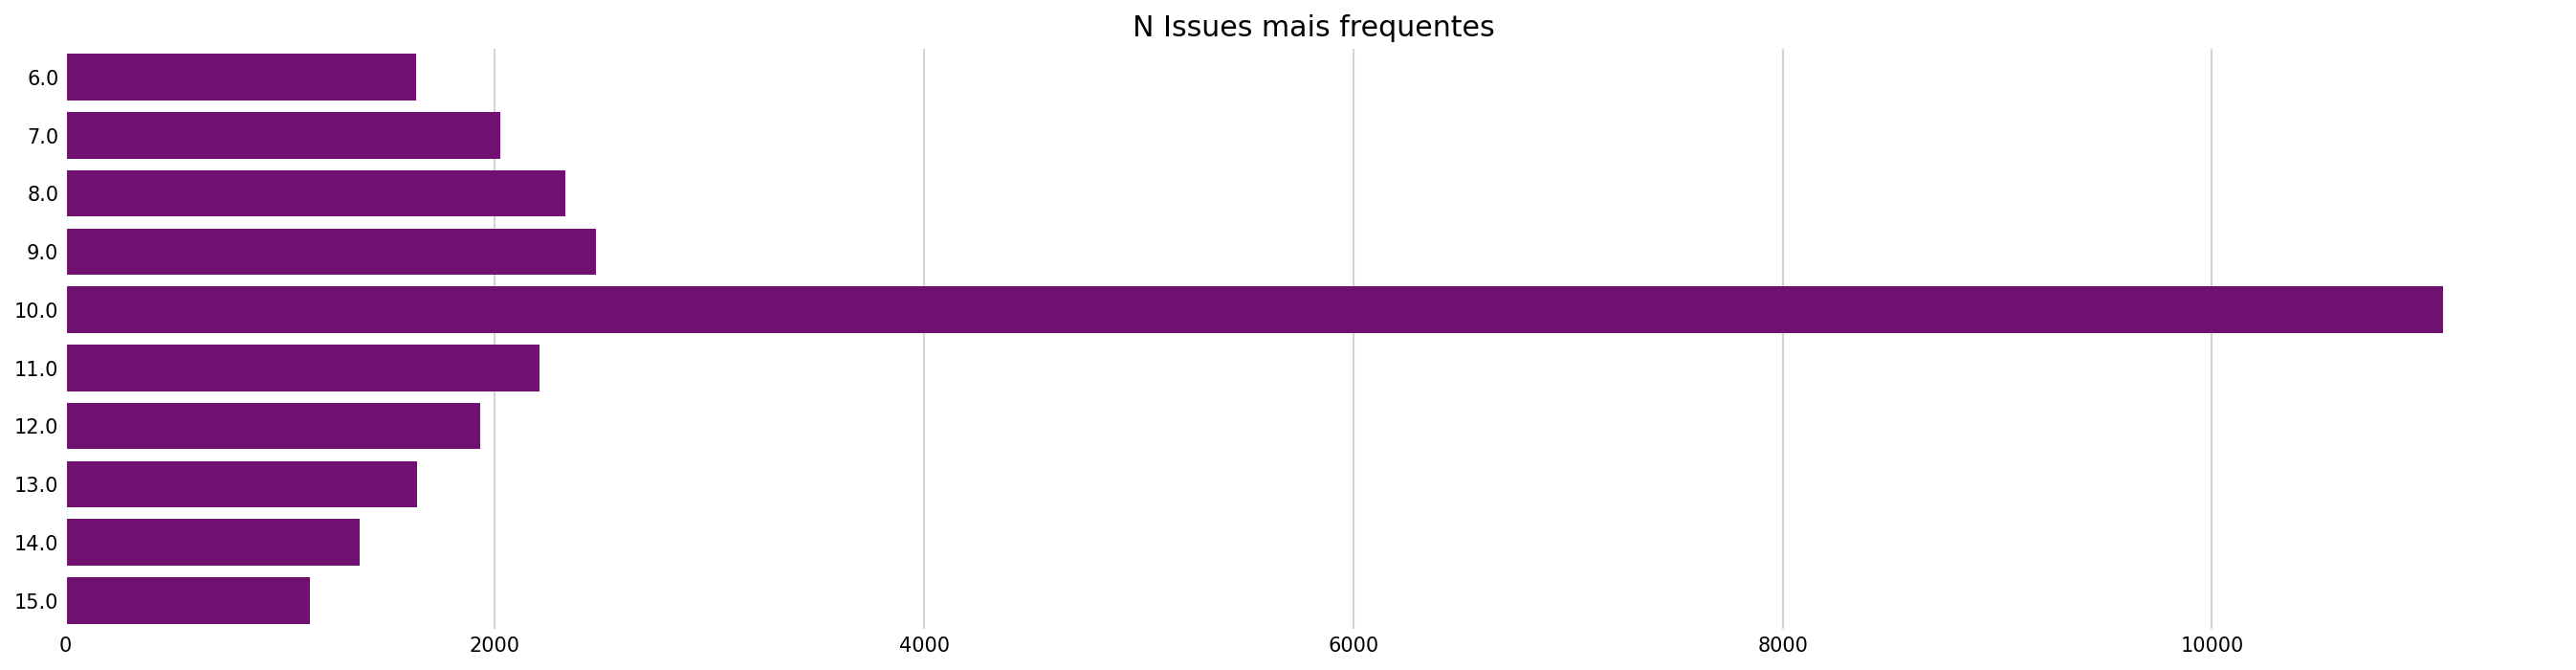

In [152]:
# TOP 10 N ISSUES MAIS FREQUENTES
n_issues_freq = train.n_issues.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('N Issues mais frequentes')
ax = sns.barplot(y=n_issues_freq.index, x=n_issues_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [153]:
train.n_issues.value_counts().head(10)

n_issues
10.0    11078
9.0      2472
8.0      2330
11.0     2209
7.0      2026
12.0     1933
13.0     1639
6.0      1634
14.0     1370
15.0     1138
Name: count, dtype: int64

- Podemos ver que 10 Números de Problemas associadas as contas dos clientes são maioria.

**External Data Provider Credit Checks Last 2 Years**

"External Data Provider Credit Checks Last 2 Years" (em português, "Consultas de Crédito por Provedores Externos nos Últimos 2 Anos") refere-se ao número de vezes que provedores externos de dados financeiros ou instituições, como bancos ou empresas de crédito, consultaram o histórico de crédito de uma pessoa ou empresa nos últimos dois anos.

O que são Provedores Externos? 

- São entidades que acessam informações financeiras para avaliar o risco de crédito, como birôs de crédito (por exemplo, Serasa, SPC, ou Boa Vista no Brasil).

- Essas consultas são realizadas por credores ou empresas ao analisar uma solicitação de crédito, empréstimos, cartões de crédito ou financiamentos.

Exemplos de "Credit Checks Last 2 Years":

- N = 3: Significa que seu histórico de crédito foi consultado 3 vezes por provedores externos nos últimos dois anos.

- N = 10: Dez consultas foram realizadas, indicando maior atividade ou interesse em suas informações financeiras.


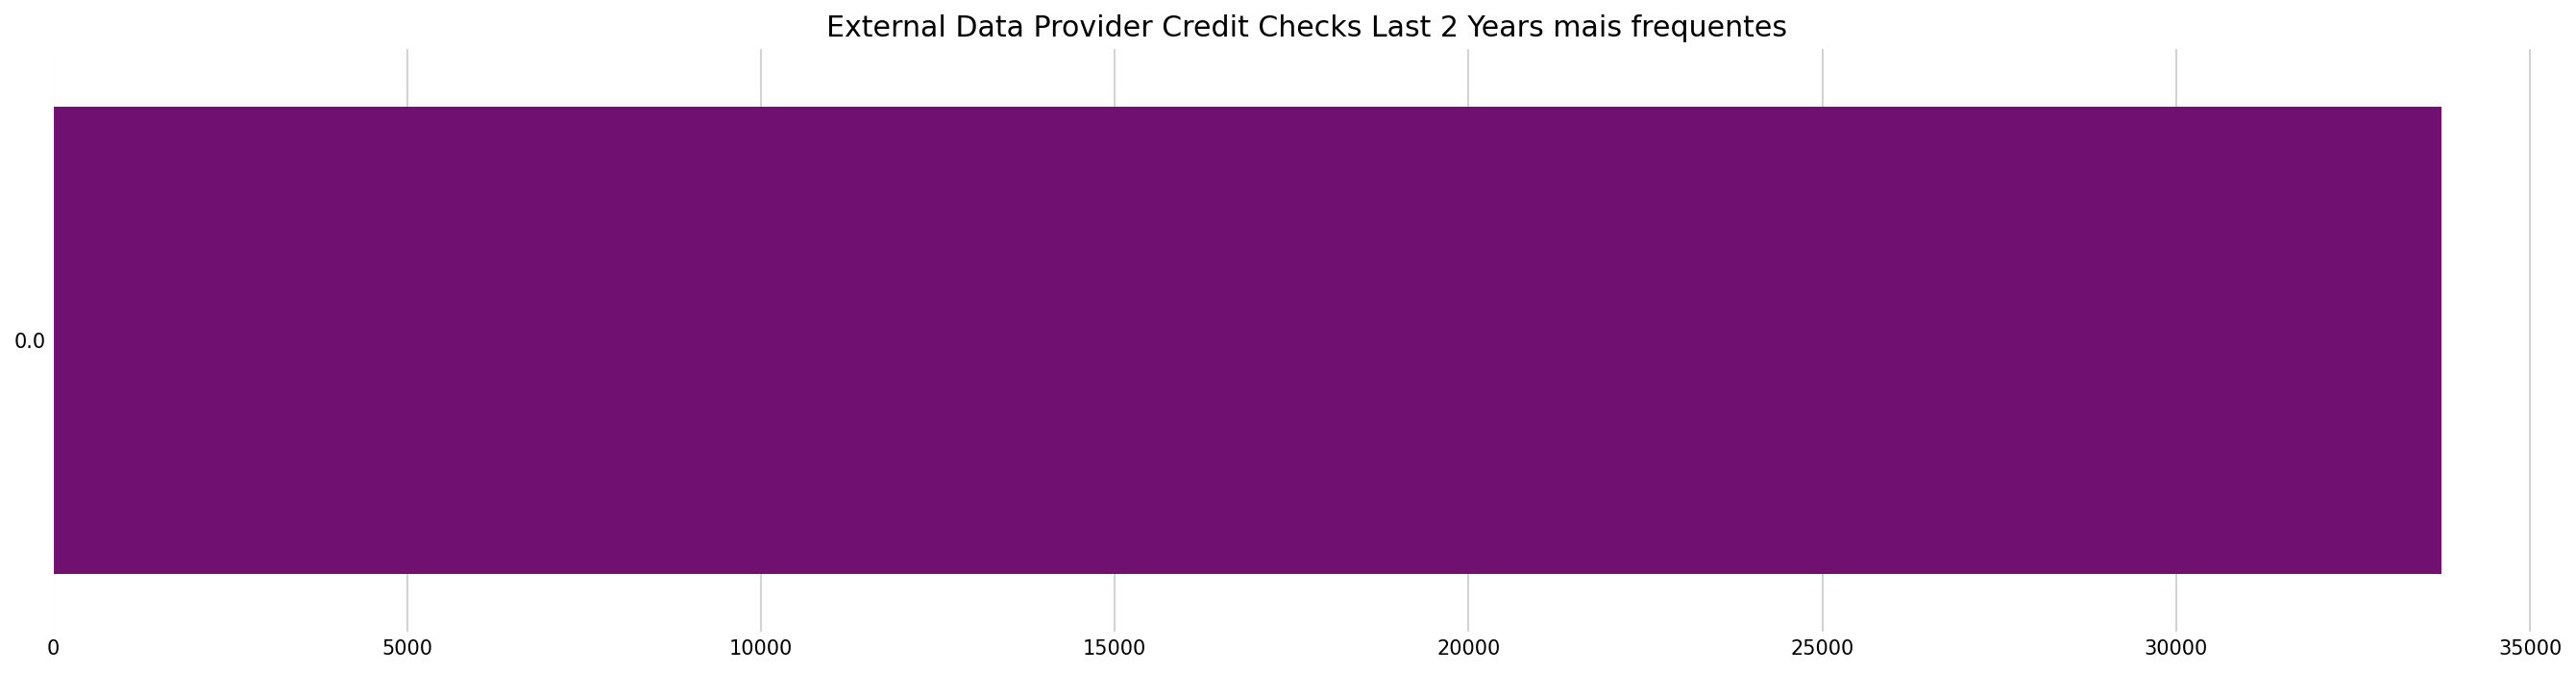

In [154]:
# External Data Provider Credit Checks Last 2 Years MAIS FREQUENTES
external_data_provider_credit_checks_last_2_year_freq = train.external_data_provider_credit_checks_last_2_year.value_counts()

plt.figure(figsize=(20,5))
plt.title('External Data Provider Credit Checks Last 2 Years mais frequentes')
ax = sns.barplot(y=external_data_provider_credit_checks_last_2_year_freq.index, x=external_data_provider_credit_checks_last_2_year_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [155]:
train.external_data_provider_credit_checks_last_2_year.value_counts()

external_data_provider_credit_checks_last_2_year
0.0    33750
Name: count, dtype: int64

- Podemos ver que 0 foi a quantidade de vezes que os provedores externos consultaram o histórico de crédito.

**External Data Provider Credit Checks Last Month**

"External Data Provider Credit Checks Last Month" (em português, "Consultas de Crédito por Provedores Externos no Último Mês") refere-se ao número de vezes que provedores externos de dados financeiros, como birôs de crédito (por exemplo, Serasa, SPC ou Boa Vista no Brasil), foram acionados para verificar seu histórico de crédito no mês anterior.

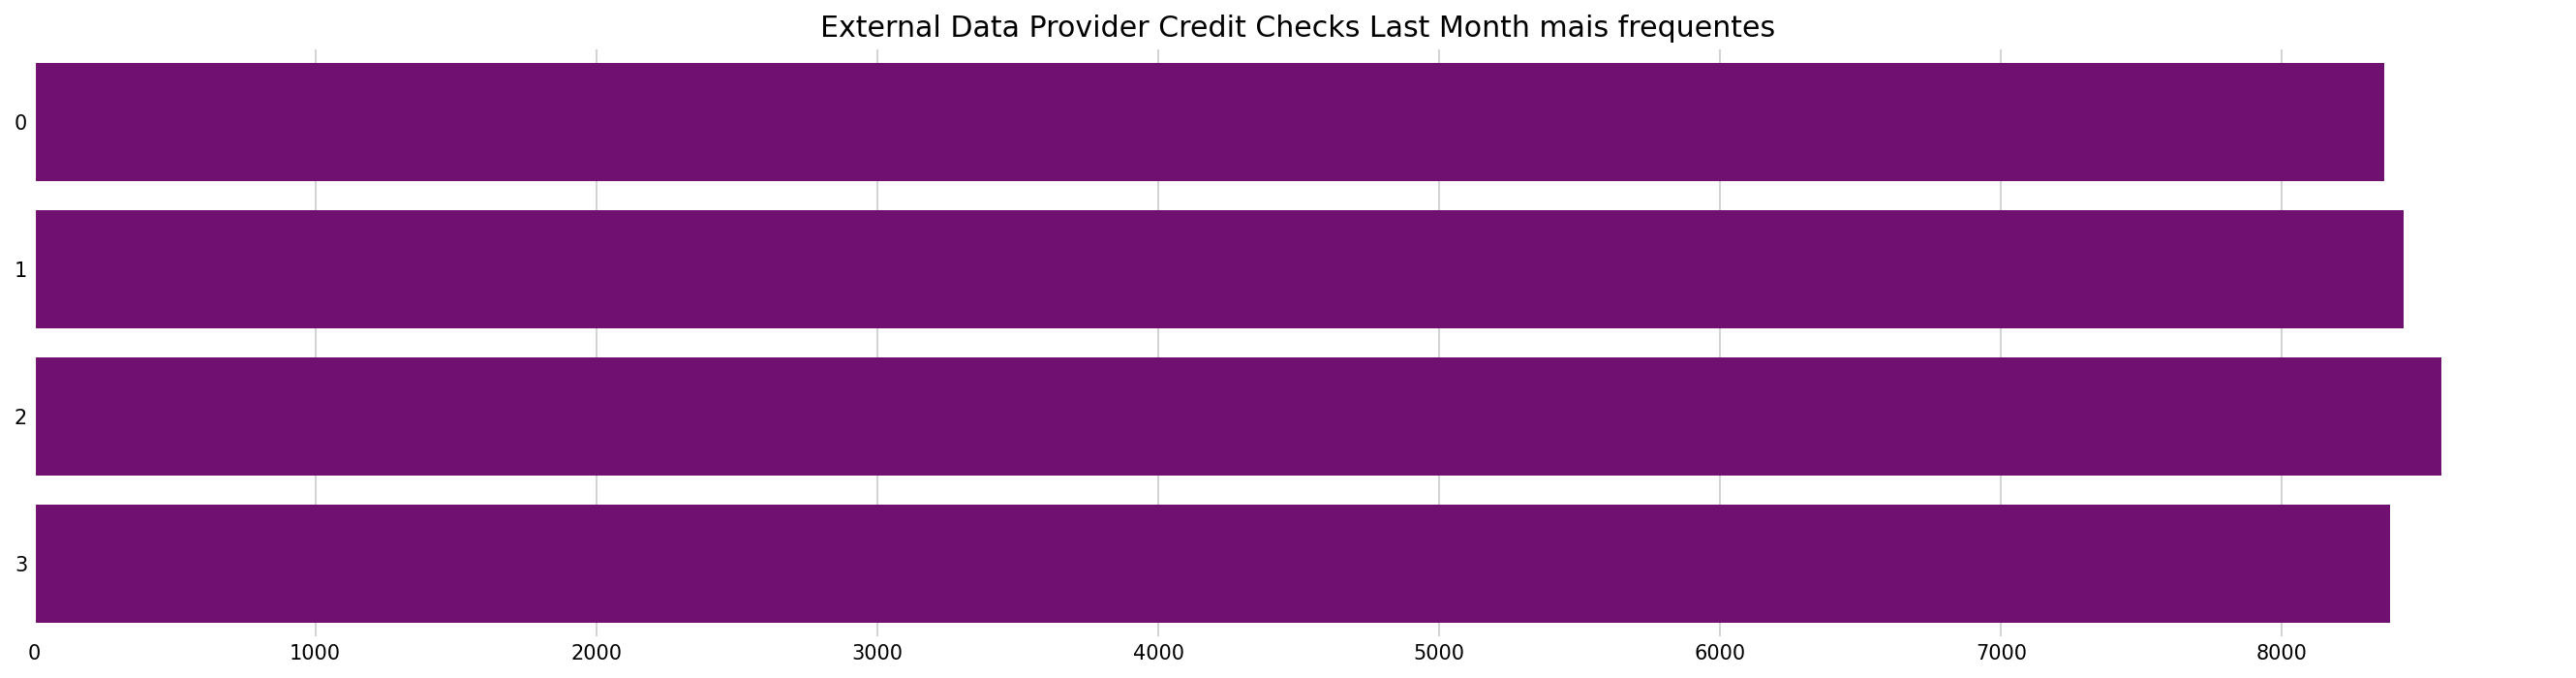

In [156]:
# External Data Provider Credit Checks Last Month MAIS FREQUENTES
external_data_provider_credit_checks_last_month_freq = train.external_data_provider_credit_checks_last_month.value_counts()

plt.figure(figsize=(20,5))
plt.title('External Data Provider Credit Checks Last Month mais frequentes')
ax = sns.barplot(y=external_data_provider_credit_checks_last_month_freq.index, x=external_data_provider_credit_checks_last_month_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [157]:
train.external_data_provider_credit_checks_last_month.value_counts()

external_data_provider_credit_checks_last_month
2    8568
1    8433
3    8384
0    8365
Name: count, dtype: int64

- Podemos ver que 2 foi a quantidade de vezes que um provedor externo consultou o histórico de crédito, seguido de 1, depois 3 vezes.

**External Data Provider Credit Checks Last Year** 

"External Data Provider Credit Checks Last Year" (em português, "Consultas de Crédito por Provedores Externos no Último Ano") refere-se ao número de vezes que instituições financeiras, empresas ou terceiros consultaram seu histórico de crédito em provedores externos de dados financeiros, como birôs de crédito (Serasa, SPC, Boa Vista, entre outros), ao longo do último ano.



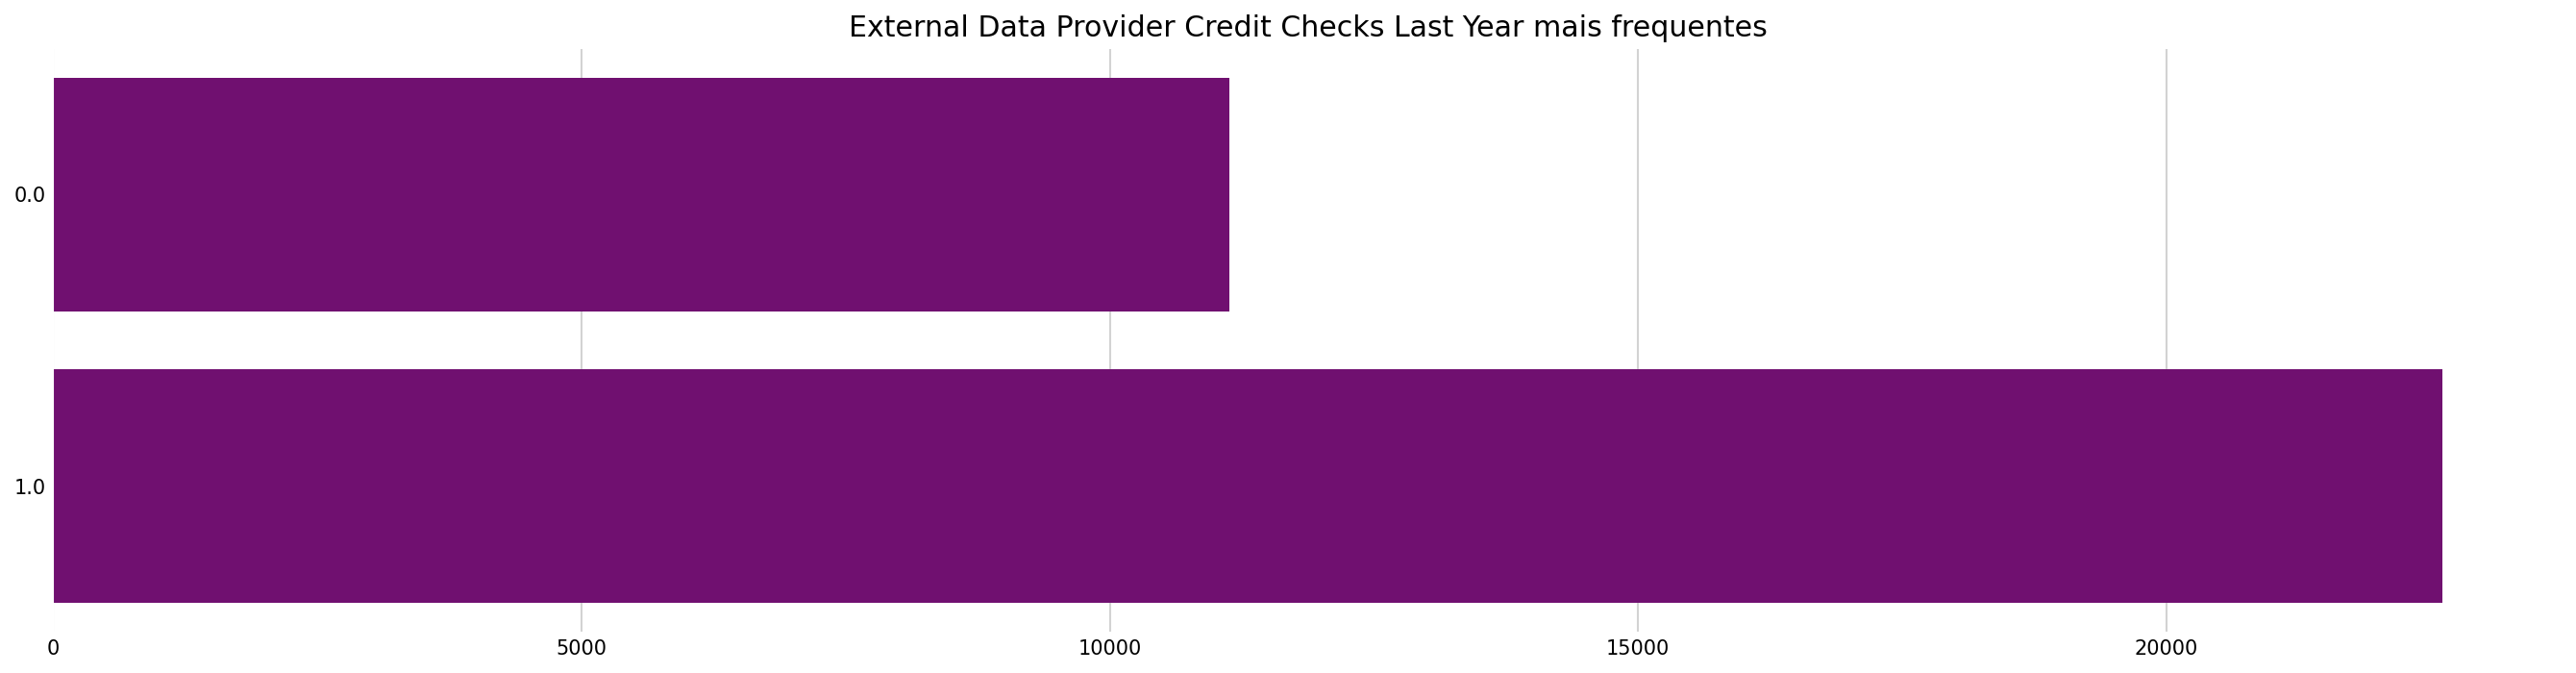

In [158]:
# External Data Provider Credit Checks Last Year MAIS FREQUENTES
external_data_provider_credit_checks_last_year_freq = train.external_data_provider_credit_checks_last_year.value_counts()

plt.figure(figsize=(20,5))
plt.title('External Data Provider Credit Checks Last Year mais frequentes')
ax = sns.barplot(y=external_data_provider_credit_checks_last_year_freq.index, x=external_data_provider_credit_checks_last_year_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [159]:
train.external_data_provider_credit_checks_last_year.value_counts()

external_data_provider_credit_checks_last_year
1.0    22616
0.0    11134
Name: count, dtype: int64

- Podemos ver que 1 vez foi a quantidade de vezes que o histórico dos clientes foram consultados com maior frequência.

**Reported Income**

"Reported Income" (em português, "Renda Declarada") refere-se ao valor de renda que uma pessoa ou empresa informa oficialmente a uma instituição ou órgão, geralmente em situações como:

1. Solicitações de Crédito:

É o valor da renda informado pelo cliente ao solicitar um empréstimo, financiamento ou cartão de crédito.
Pode incluir salários, lucros, aluguéis, pensões ou outras fontes de receita.

2. Declarações Fiscais:

É o valor registrado em documentos oficiais, como declarações de imposto de renda, para fins tributários.
Esse valor deve ser compatível com os rendimentos reais para evitar penalidades legais.

3. Verificações de Renda:

Algumas instituições podem solicitar comprovantes, como contracheques, extratos bancários ou declarações fiscais, para validar o "reported income".

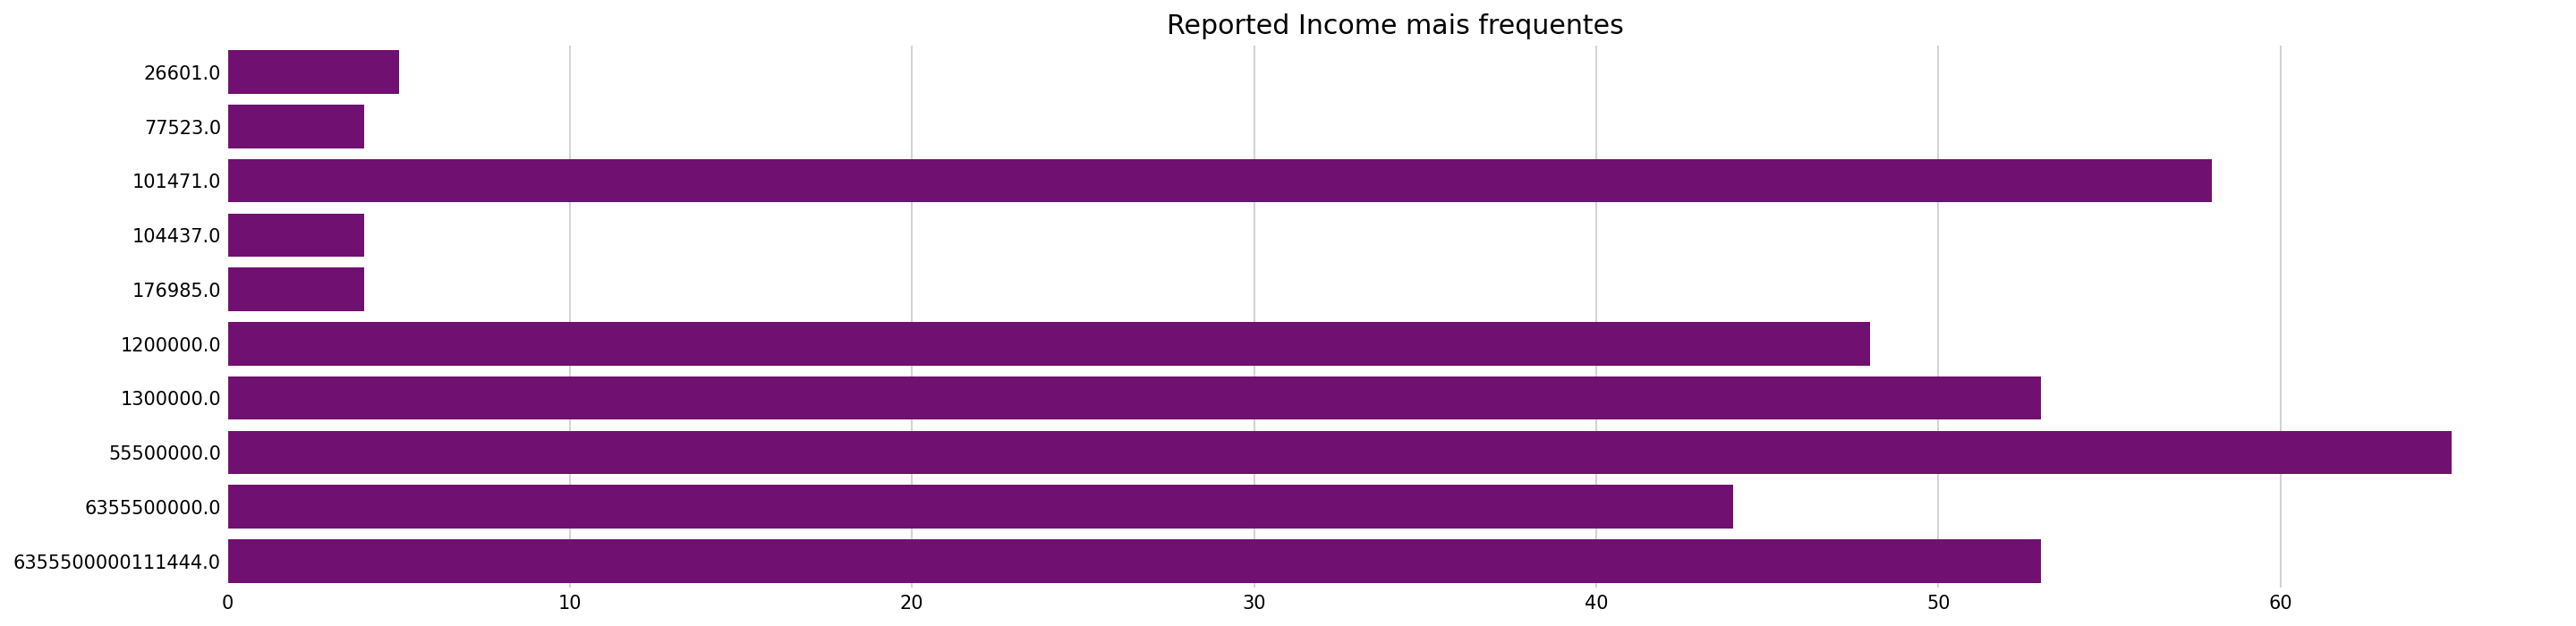

In [160]:
# Top Reported Income MAIS FREQUENTES
reported_income_freq = train.reported_income.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Reported Income mais frequentes')
ax = sns.barplot(y=reported_income_freq.index, x=reported_income_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [161]:
train.reported_income.value_counts().head()

reported_income
5.550000e+07    65
1.014710e+05    58
1.300000e+06    53
6.355500e+15    53
1.200000e+06    48
Name: count, dtype: int64

- Podemos ver que temos valores de Reported Income na casa de milhões, acredito que nesse caso são declarações anuais.
- O valor de 55.500.000 é o mais frequente.
- Em segundo lugar vem o valor de 101.471.
- Precisamos analisar esses valores para descobrir possiveis outliers.

**Shipping State**

"Shipping State" (em português, "Estado de Envio") refere-se ao estado (ou província, dependendo do país) onde um pacote ou produto será enviado ou está sendo enviado. Esse termo é comumente usado em processos de compras online e logística para identificar a localização de entrega dentro de um país.

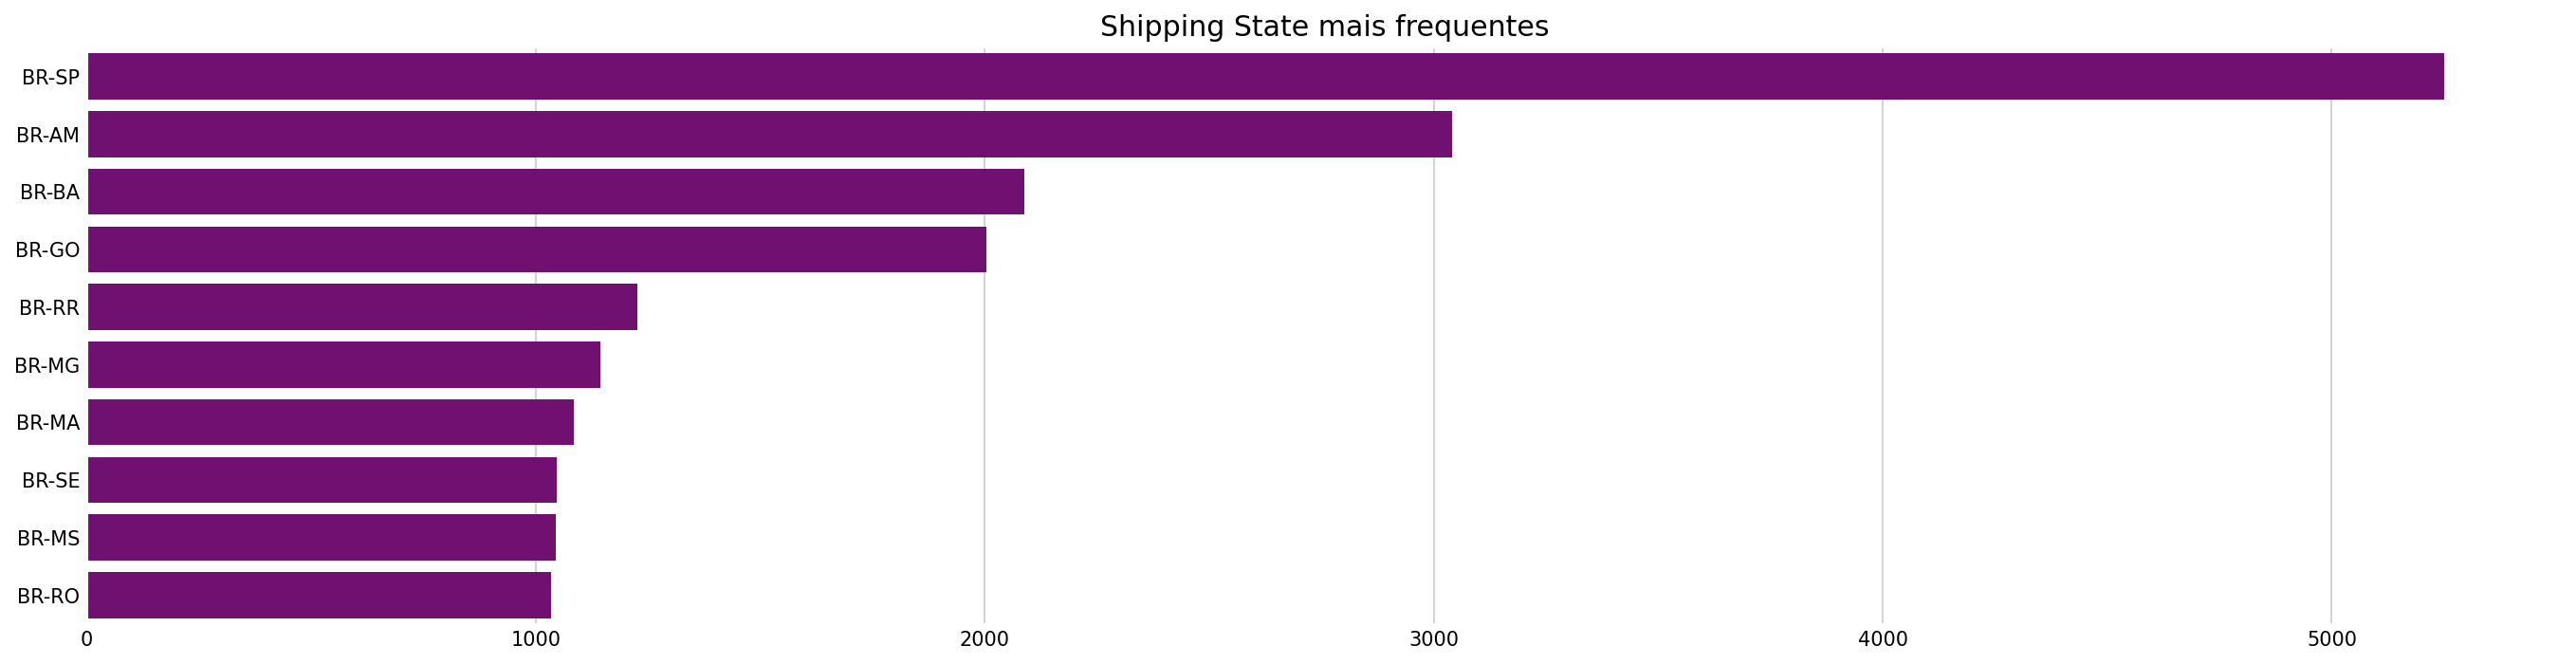

In [162]:
# Top Shipping State MAIS FREQUENTES
shipping_state_freq = train.shipping_state.value_counts().head(10)

plt.figure(figsize=(20,5))
plt.title('Shipping State mais frequentes')
ax = sns.barplot(y=shipping_state_freq.index, x=shipping_state_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

- Podemos ver que SP é o estado com mais frequência, em segundo vem o AM.

In [163]:
train.head()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,reported_income,shipping_state,target_default
0,240.0,105.331178,0.893486,94.495216,0.26,12024.02,36.0,21968.0,45013.96,32.0,1.0,0.0,11.0,11.0,0.0,2,1.0,92586.0,BR-ES,False
1,270.0,103.211042,0.605574,101.567582,0.33,19237.32,36.0,40972.0,80022.23,32.0,0.0,0.0,12.0,12.0,0.0,3,1.0,95975.0,BR-GO,False
2,260.0,102.557916,0.917576,117.057610,0.28,12024.02,36.0,31510.0,19225.52,32.0,0.0,0.0,7.0,10.0,0.0,1,1.0,53981.0,BR-PR,False
3,300.0,101.664122,0.627588,89.140113,0.28,12024.02,36.0,31510.0,60043.78,62.0,0.0,0.0,9.0,10.0,0.0,2,1.0,140976.0,BR-DF,False
4,350.0,109.603725,0.657344,98.574923,0.27,12024.02,36.0,156549.0,45032.90,45.0,0.0,0.0,25.0,25.0,0.0,3,1.0,120129.0,BR-SP,False


**Target Default**

Target default no contexto de credit risk (risco de crédito) refere-se à definição de inadimplência que é usada como a variável alvo (target) em modelos de previsão de risco de crédito. Essa variável indica se um cliente (pessoa física ou jurídica) cumpriu ou não suas obrigações financeiras, como pagamentos de empréstimos ou financiamentos.

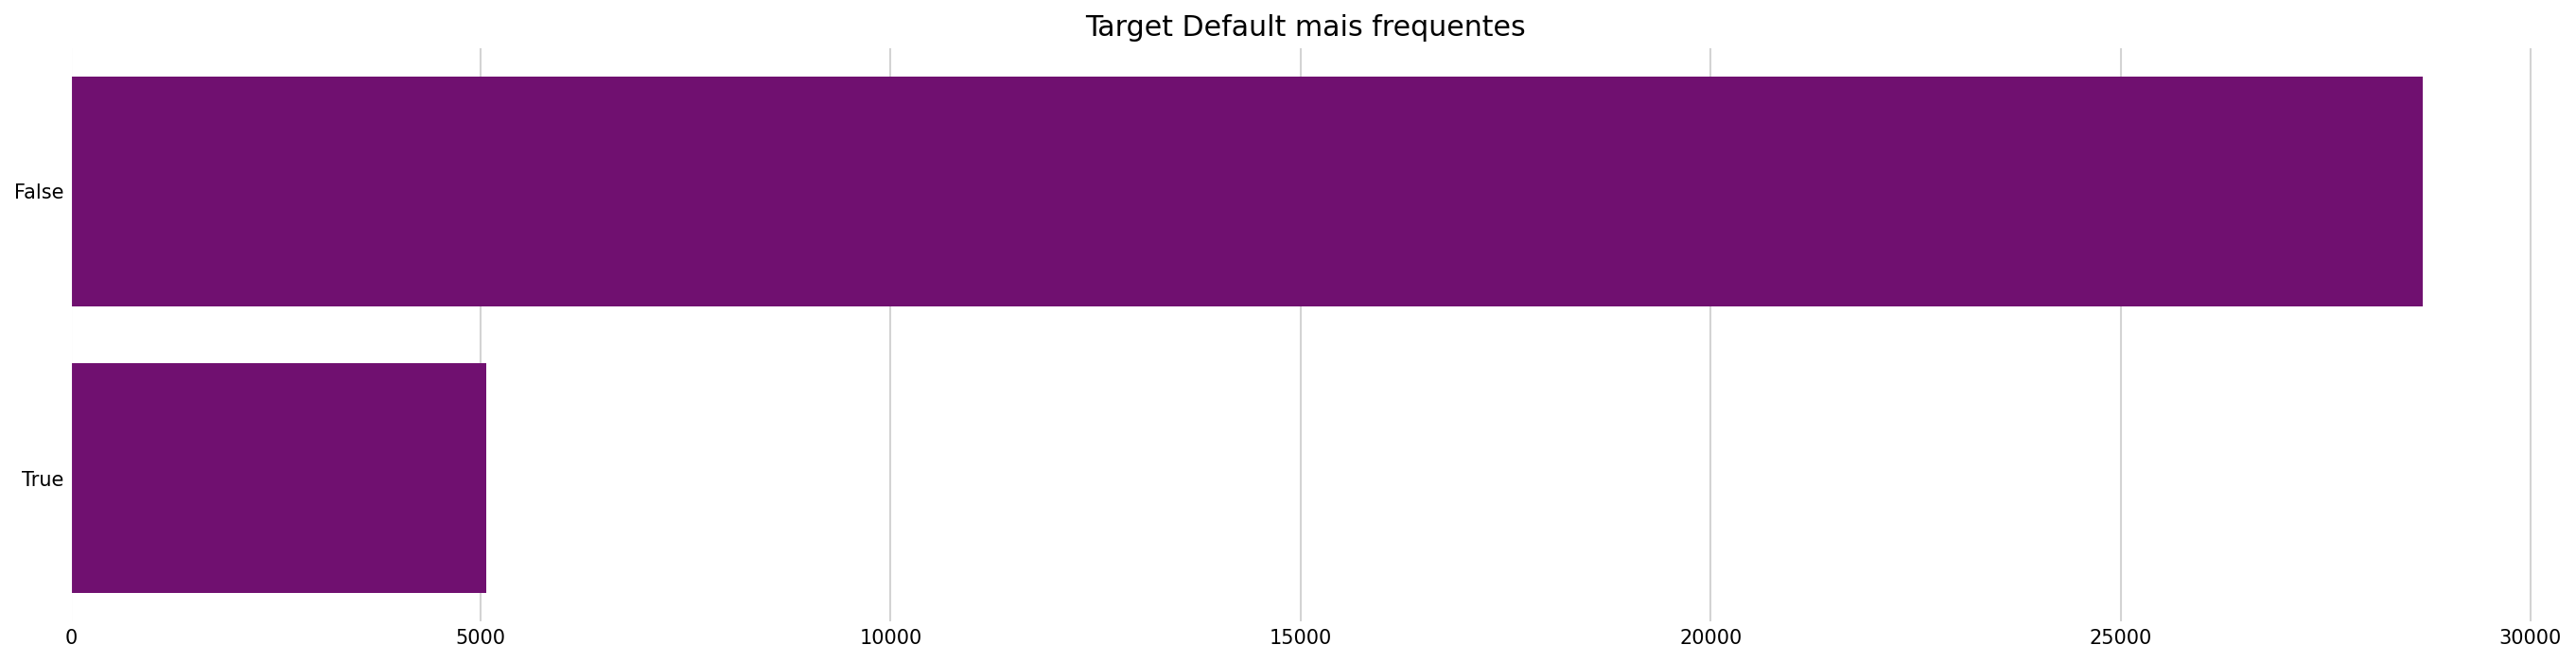

In [164]:
# Target Default MAIS FREQUENTES
target_default_freq = train.target_default.value_counts()

plt.figure(figsize=(20,5))
plt.title('Target Default mais frequentes')
ax = sns.barplot(y=target_default_freq.index, x=target_default_freq, orient='h', color='purple')
ax.set(xlabel=None, ylabel=None)
plt.show()

In [165]:
train.target_default.value_counts()

target_default
False    28680
True      5070
Name: count, dtype: int64

- Há 28.680 clientes sem risco de crédito contra 5.070 com risco de crédito.

## Relatório Análise Univariada

- Entre os **Scores**, o Score 3 é o mais diversificado para uma análise bi e multivariada, onde o score **340.0** é o valor mais frequente.

- Em **Risk Rate** o valor de **0.29** é o valor mais frequente, onde o valor máximo registrado é de **0.9**.

- Em **Last Amount Borrowed** o valor de **12024.02** é o mais frequente, e praticamente isolado, pois em segundo lugar vem o valor de 10022.75 com apenas 3 registros.

- Em **Last Borrowed in Months** **36.0** meses é o intervalo com mais frequência.

- Em **Credit Limit** o valor de **31510.0** é o valor mais frequente, e praticamente isolado, pois em segundo lugar vem o valor de **10000.0** com apenas **78** registros.

- Em **Income** o valor de **61291.01** é o mais frequente, e praticamente isolado, pois em segundo lugar vem o valor de **75017.74** com apenas 5 registros.

- Em **Ok Since** temos o valor de **32.0** com mais frequência e praticamente isolado, com **20079** registros.

- Em **N Bankruptcies** não há muitas declarações de falência, **31259** são a quantidade de registros sem declaração de falência.

- Em **N Defaulted Loans** grande parte dos empréstimos não estão como inadimplentes.

- Em **N Accounts** podemos ver que grande parte dos clientes possuem mais de **5** a **10** contas ou créditos em seus nomes.

- Em **N Issues** podemos ver que **10** problemas ou ocorrências, irregularidades associadas as contas dos clientes são mais frequentes, seguidas de 9, 8 e 11 ocorrências.

- Em **External Data Provider Credit Checks Last 2 Years** possuem **0** quantidade de consultas.

- **External Data Provider Credit Checks Last Month** já é um pouco diferente. **2** é o números mais frequente de vezes que provedores externos consultaram o histórico de crédito no mês anterior.

- Em **External Data Provider Credit Checks Last Year** **1** que siginica True é o numero com mais frequência em consultas dos dados históricos de crédito.

- Em **Reported Income** temos valores bem altos, na casa de milhões com mais frequência, em seguida vem valores mais aceitáveis, precisamos checar possiveis outliers.

- Em **Shipping State** é basicamente o registro dos estados onde se localizam cada cliente. **SP** é o estado com mais frequência.

- E em **Target Default** podemos ver que há mais registros **positivos** com relação aos créditos.